# EDA PORTFOLIO

In this Portfolio We will be doing a Uni, Bi, and Tri variate alalysis on the cleaned diabetic dataset. The dataset consists of 49 columns currently and has a size of 101766 values for each column. The dataset has had one column of **'Weight'** removed as it consisted mostly of null values. For the rest of the dataset the null values have been filled with either their mode or is filled as 'unknown'. We will use *Pandas, numpy, and seaborn* for this data analysis. This is done to train a model with the target as ***'readmitted'***. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('EDA_Data/cleaned_data.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                101766 non-null  object
 10  medical_specialty         101766 non-null  object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

## UNIVARIATE ANALYSIS
Univariate analysis is the process of analyzing each and every variable (column) seperately. For ***Numeric*** columns, we will find the count, mean, standard deviation, skew, kurtosis, IQR, outlirs, and bins. We will also create ***histograms*** and ***bar graph***s for the ***Numeric*** and ***Categorical (object)*** columns respectively. For finding the number of bins for the histogram we have used the Freedman-Diaconis rule.

In [3]:
# Function to calculate the number of bins using Freedman-Diaconis rule
def fd_bins(x):
    n = x.size
    iqr = x.quantile(0.75) - x.quantile(0.25)
    w = 2 * iqr * n ** (-1/3)
    if w > 0:
        return int(np.ceil((x.max() - x.min()) / w))
    else:
        return int(np.ceil(np.log2(n) + 1))

report = []
# Univariate analysis for numerical columns

for col in data.select_dtypes(include='number'):
    s = data[col].dropna()
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    lower_fence, upper_fence = q1 - 1.5*iqr, q3 + 1.5*iqr
    out_count = s[(s < lower_fence) | (s > upper_fence)].count()
    report.append({
        'column': col,
        'count': s.size,
        'mean': s.mean(),
        'std': s.std(),
        'skew': s.skew(),
        'kurtosis': s.kurtosis(),
        'IQR': iqr,
        'outliers': out_count,
        'bins': fd_bins(s)
    })
    
univar_num = pd.DataFrame(report)
print(univar_num)

                      column   count          mean           std       skew  \
0               encounter_id  101766  1.652016e+08  1.026403e+08   0.699142   
1                patient_nbr  101766  5.433040e+07  3.869636e+07   0.471281   
2          admission_type_id  101766  2.024006e+00  1.445403e+00   1.591984   
3   discharge_disposition_id  101766  3.715642e+00  5.280166e+00   2.563067   
4        admission_source_id  101766  5.754437e+00  4.064081e+00   1.029935   
5           time_in_hospital  101766  4.395987e+00  2.985108e+00   1.133999   
6         num_lab_procedures  101766  4.309564e+01  1.967436e+01  -0.236544   
7             num_procedures  101766  1.339730e+00  1.705807e+00   1.316415   
8            num_medications  101766  1.602184e+01  8.127566e+00   1.326672   
9          number_outpatient  101766  3.693572e-01  1.267265e+00   8.832959   
10          number_emergency  101766  1.978362e-01  9.304723e-01  22.855582   
11          number_inpatient  101766  6.355659e-01  

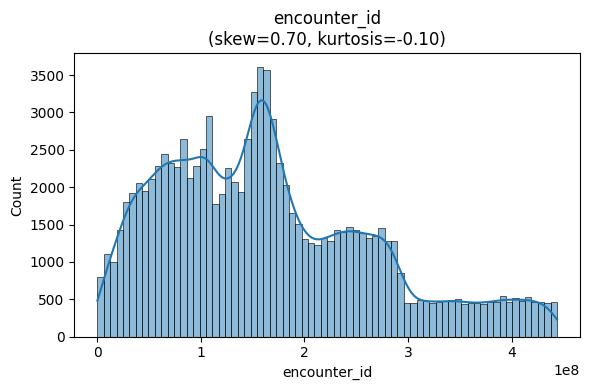

count    1.017660e+05
mean     1.652016e+08
std      1.026403e+08
min      1.252200e+04
25%      8.496119e+07
50%      1.523890e+08
75%      2.302709e+08
max      4.438672e+08
Name: encounter_id, dtype: float64 



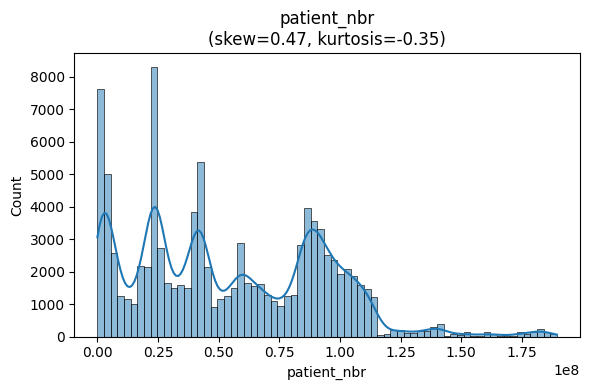

count    1.017660e+05
mean     5.433040e+07
std      3.869636e+07
min      1.350000e+02
25%      2.341322e+07
50%      4.550514e+07
75%      8.754595e+07
max      1.895026e+08
Name: patient_nbr, dtype: float64 



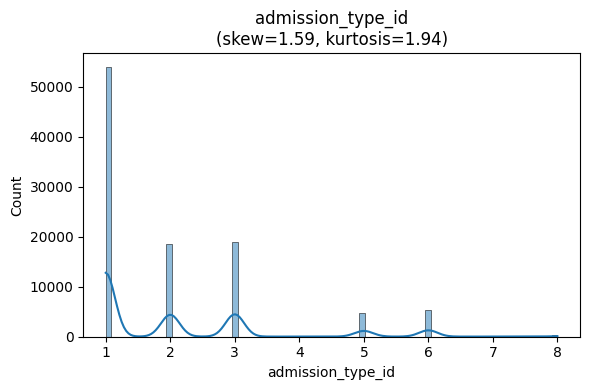

count    101766.000000
mean          2.024006
std           1.445403
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           8.000000
Name: admission_type_id, dtype: float64 



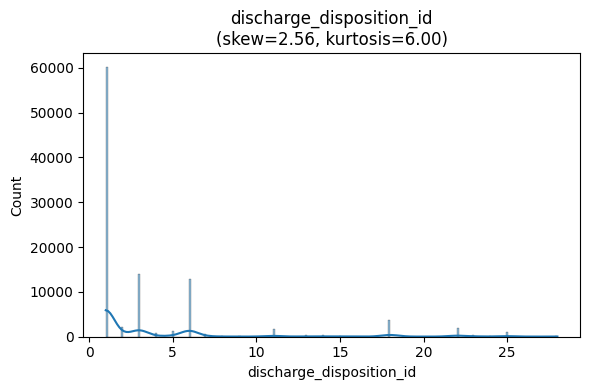

count    101766.000000
mean          3.715642
std           5.280166
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          28.000000
Name: discharge_disposition_id, dtype: float64 



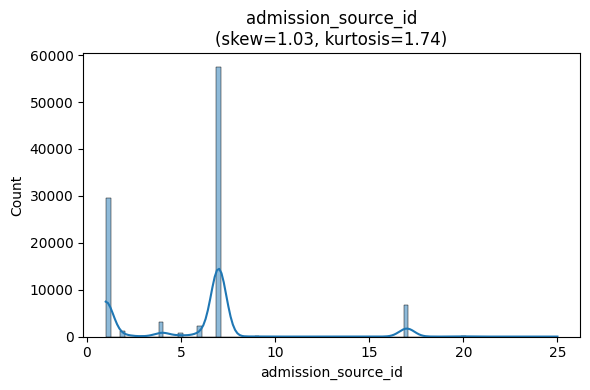

count    101766.000000
mean          5.754437
std           4.064081
min           1.000000
25%           1.000000
50%           7.000000
75%           7.000000
max          25.000000
Name: admission_source_id, dtype: float64 



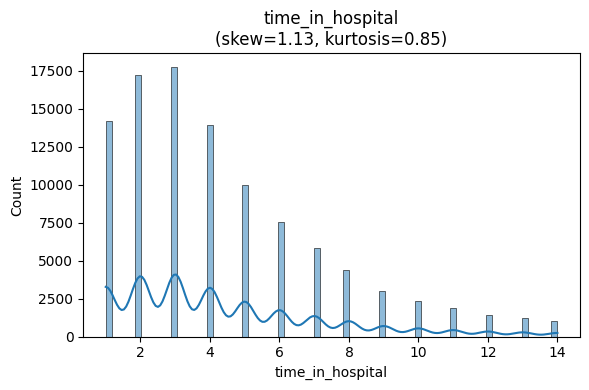

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64 



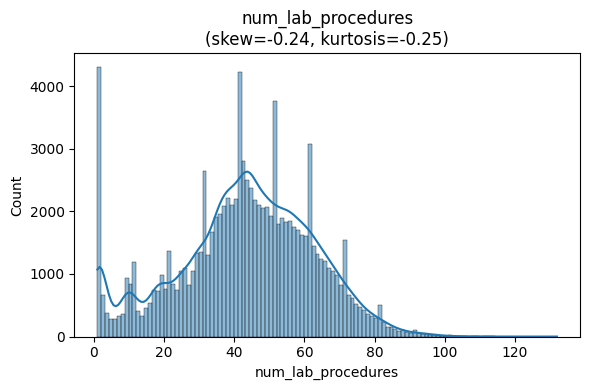

count    101766.000000
mean         43.095641
std          19.674362
min           1.000000
25%          31.000000
50%          44.000000
75%          57.000000
max         132.000000
Name: num_lab_procedures, dtype: float64 



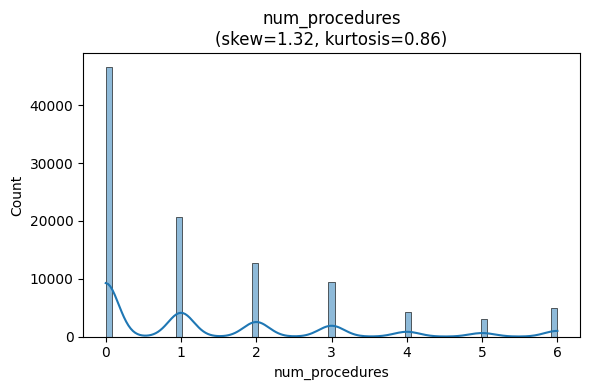

count    101766.000000
mean          1.339730
std           1.705807
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: num_procedures, dtype: float64 



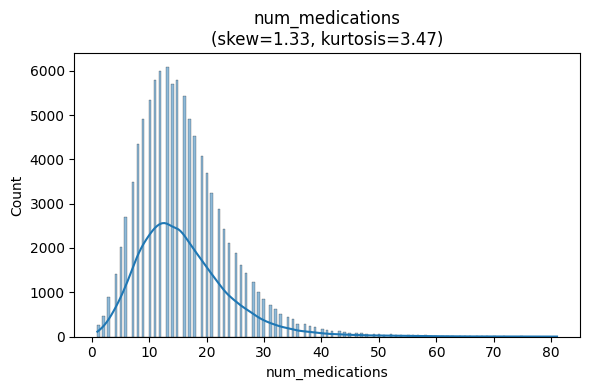

count    101766.000000
mean         16.021844
std           8.127566
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64 



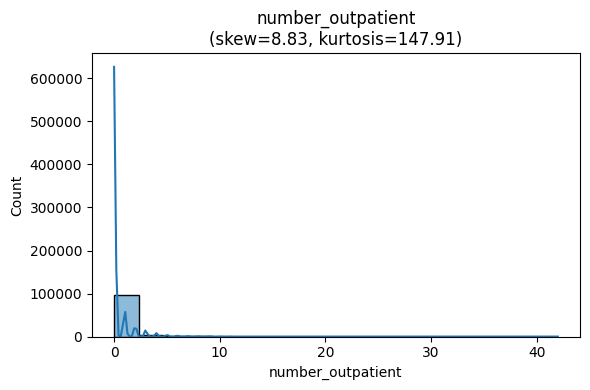

count    101766.000000
mean          0.369357
std           1.267265
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          42.000000
Name: number_outpatient, dtype: float64 



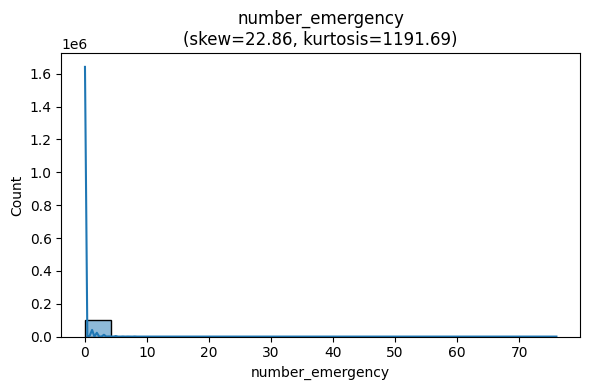

count    101766.000000
mean          0.197836
std           0.930472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          76.000000
Name: number_emergency, dtype: float64 



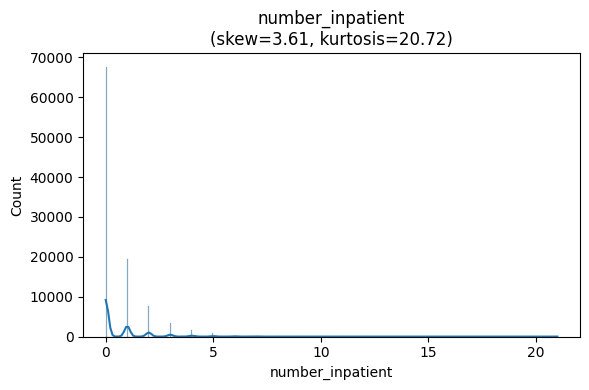

count    101766.000000
mean          0.635566
std           1.262863
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          21.000000
Name: number_inpatient, dtype: float64 



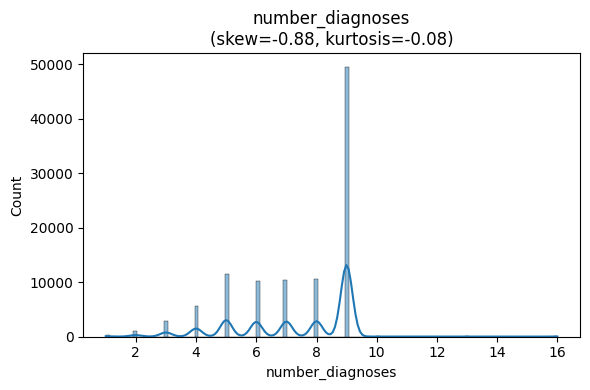

count    101766.000000
mean          7.422607
std           1.933600
min           1.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          16.000000
Name: number_diagnoses, dtype: float64 



In [4]:
for _, row in univar_num.iterrows():

    col = row['column']
    bins = int(row['bins'])
    series = data[col].dropna()
    
    plt.figure(figsize=(6, 4))
    sns.histplot(series, bins=bins, kde=True)
    plt.title(f"{col}\n(skew={series.skew():.2f}, kurtosis={series.kurtosis():.2f})")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    print(f'{data[col].describe()} \n')

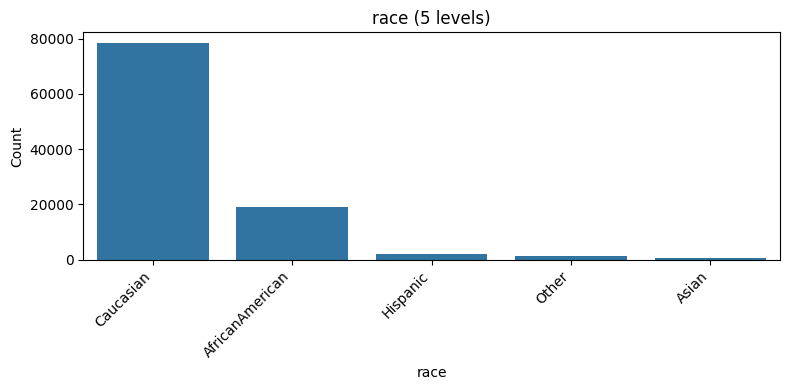

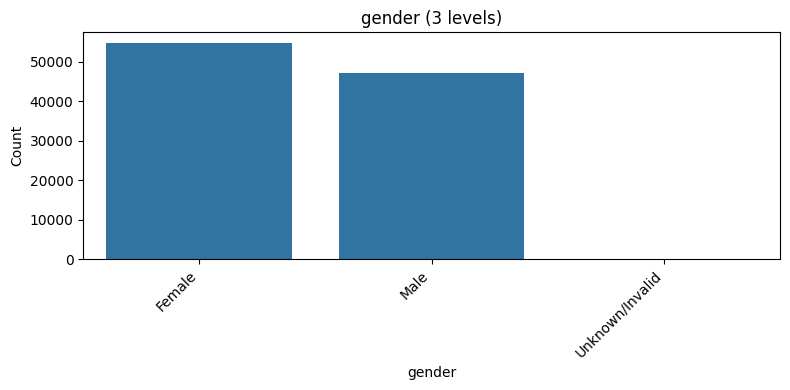

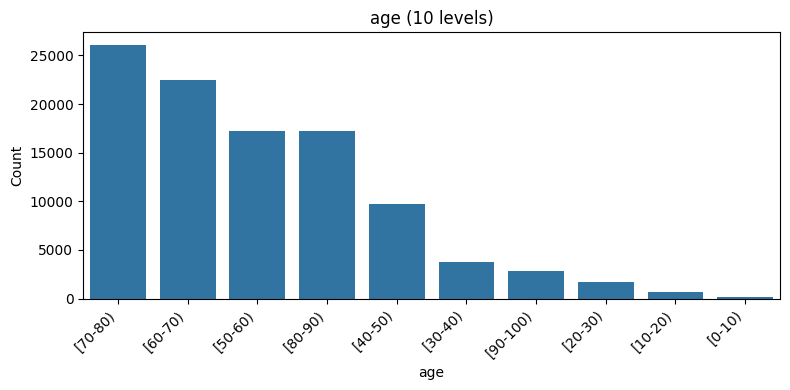

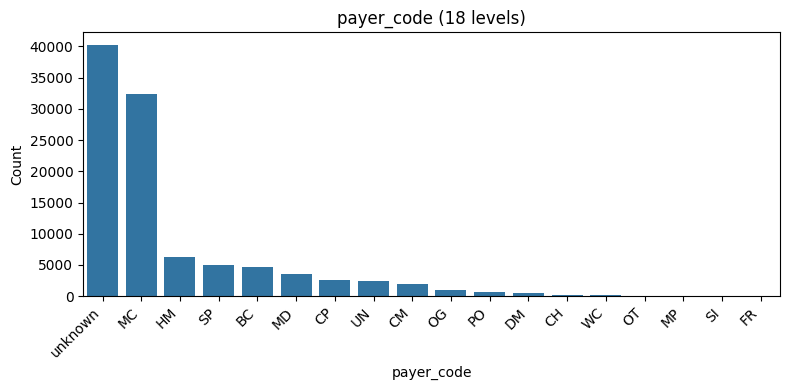

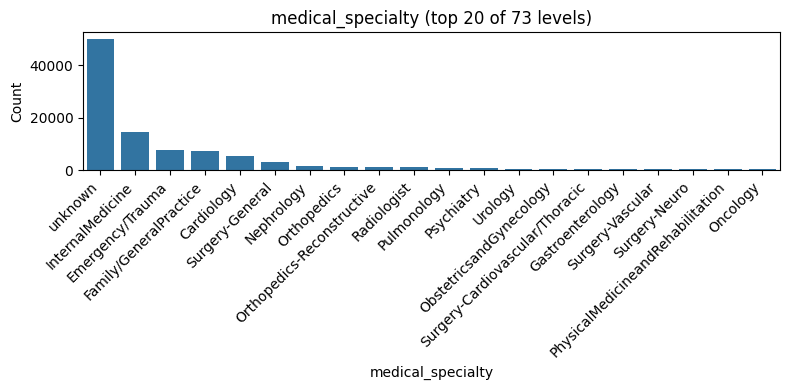

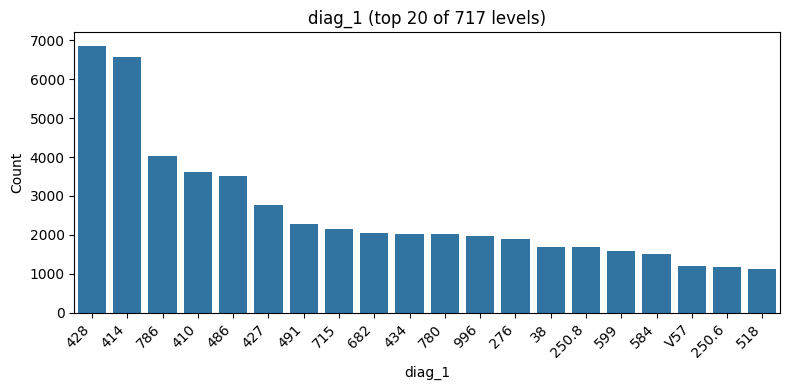

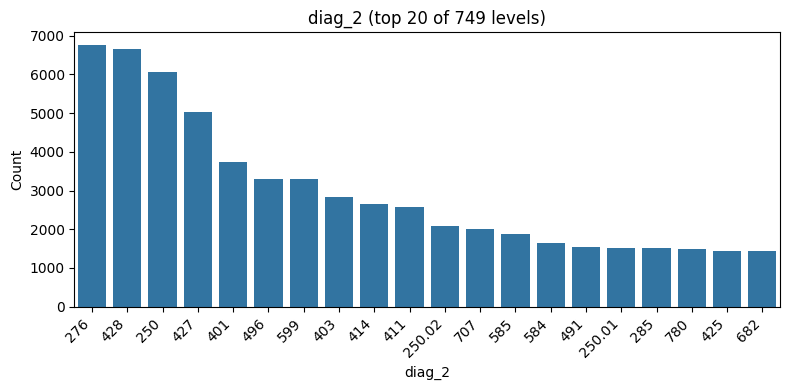

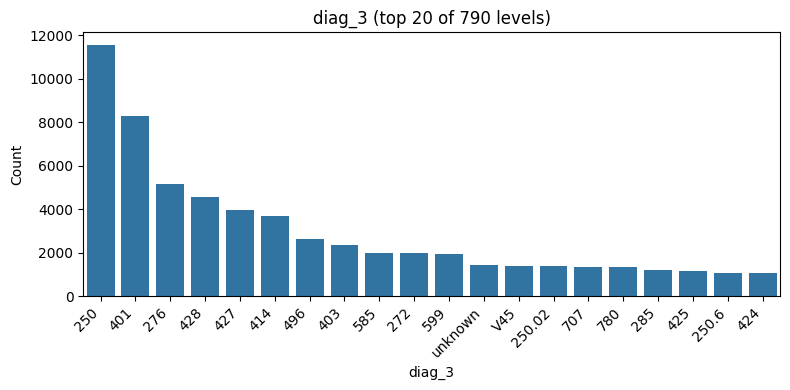

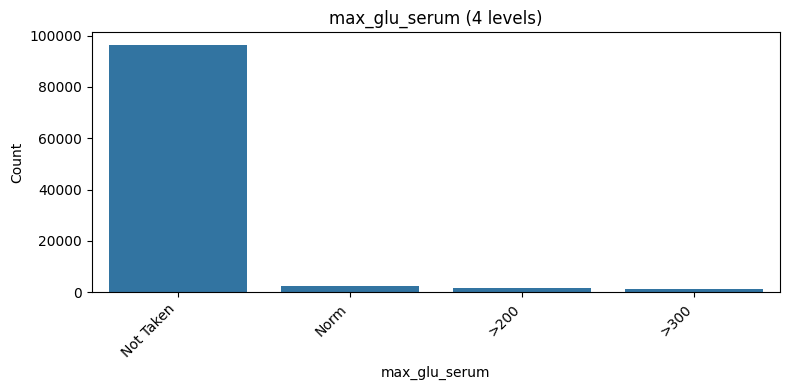

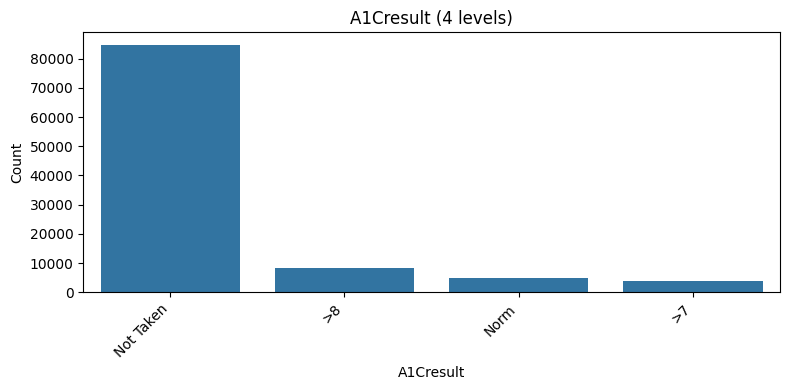

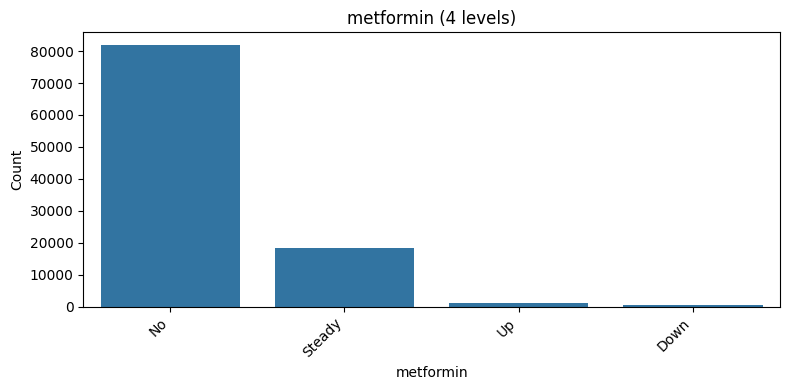

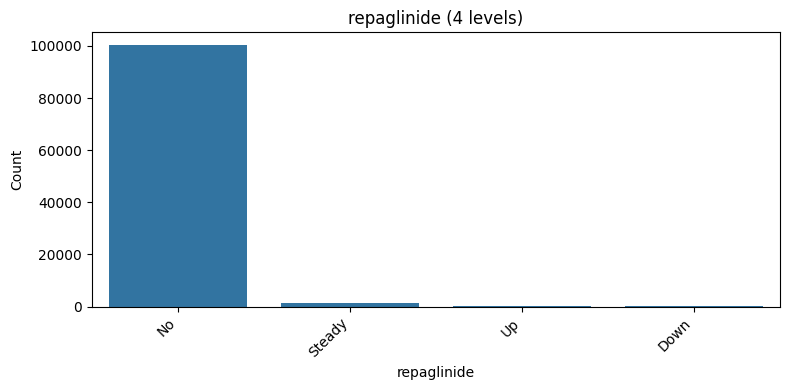

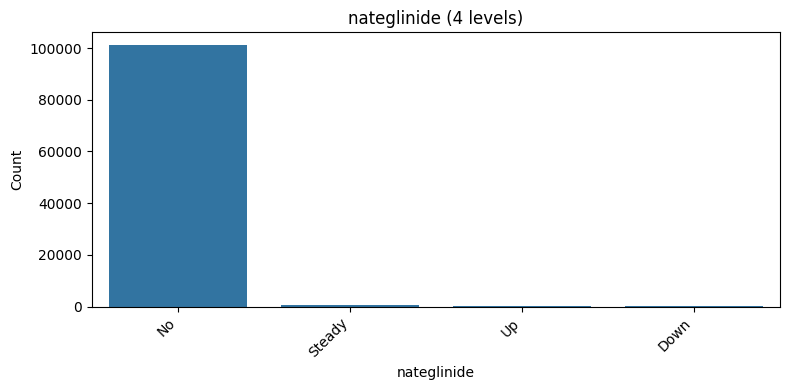

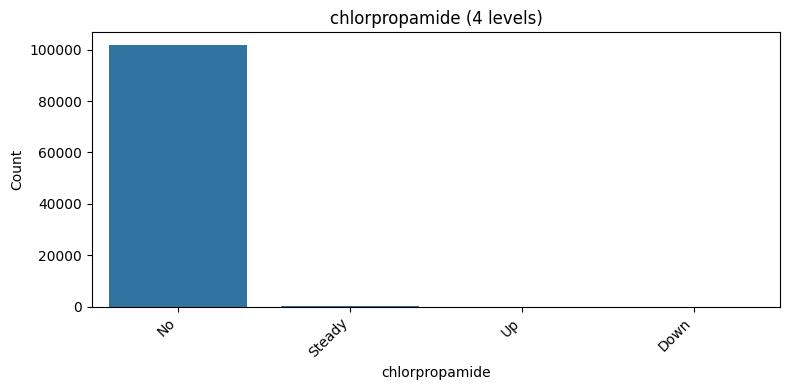

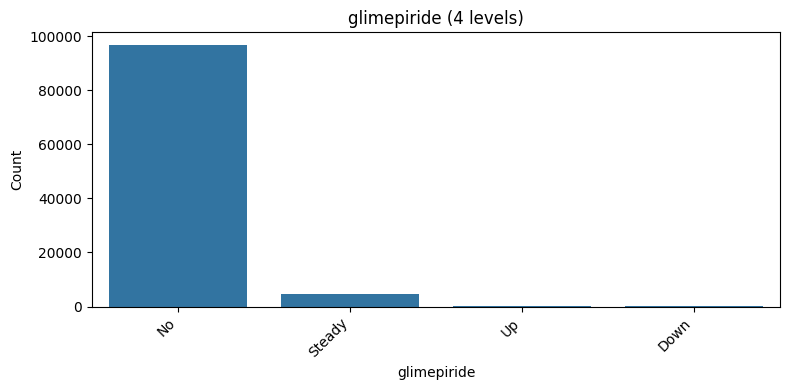

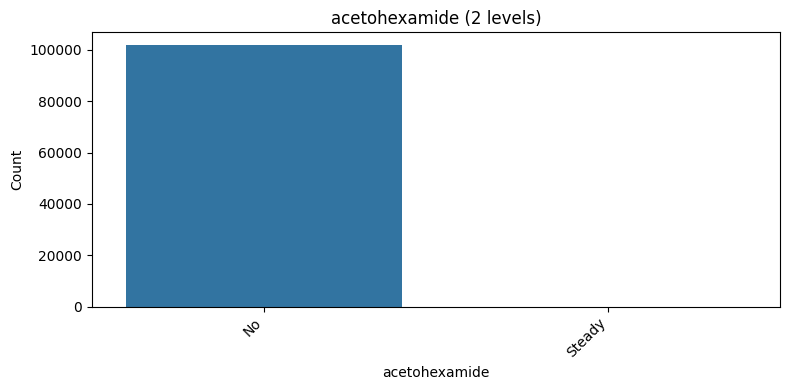

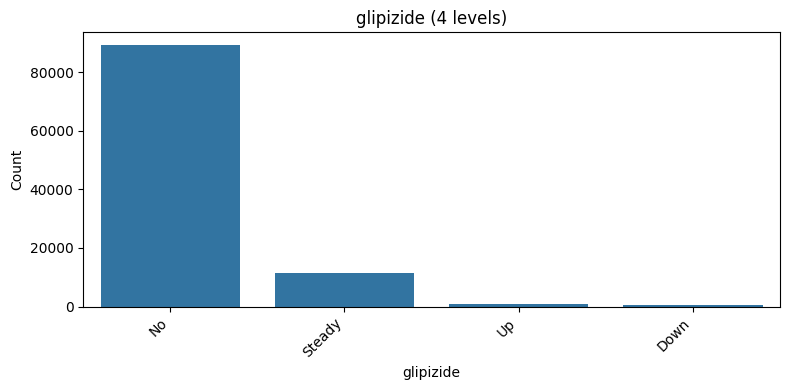

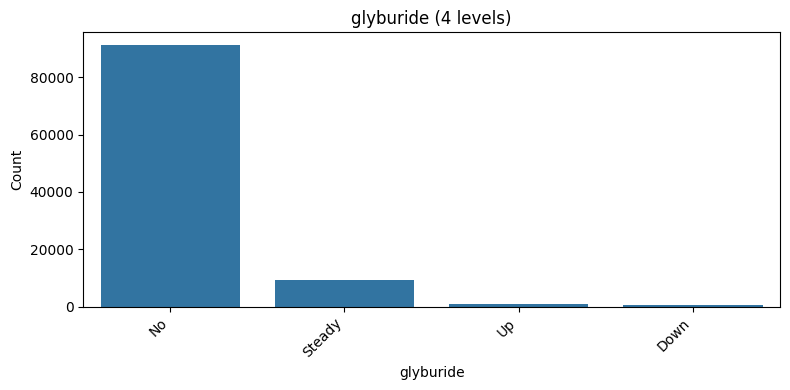

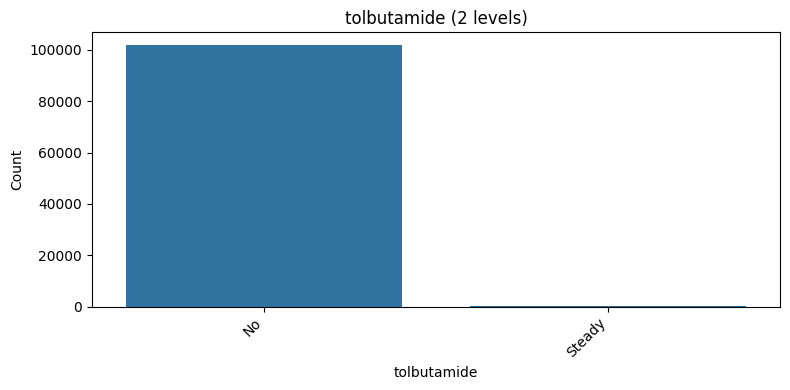

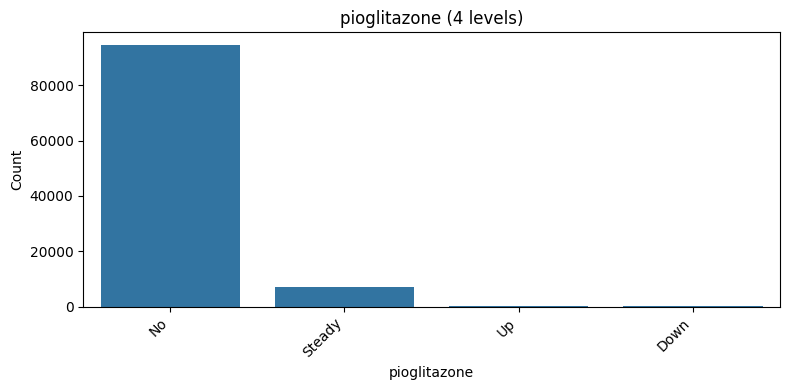

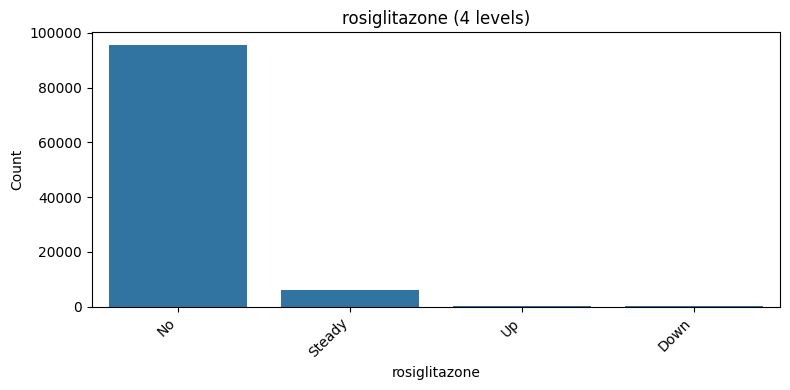

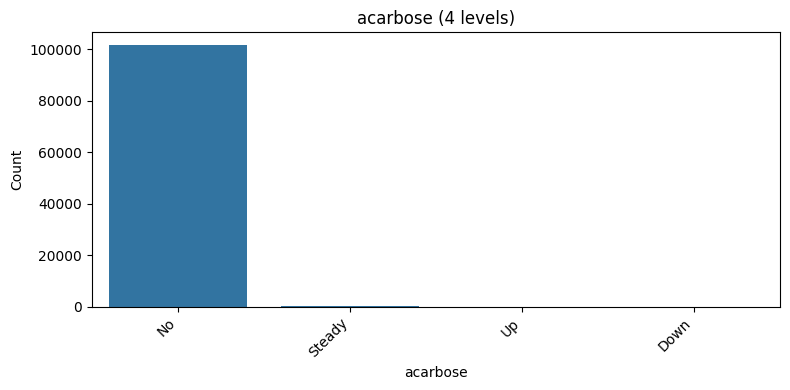

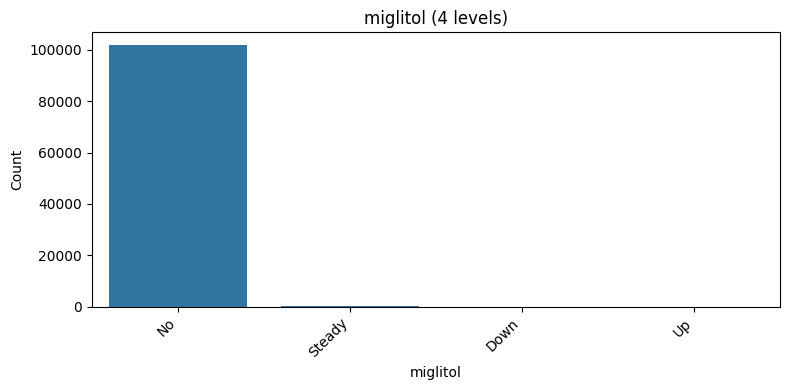

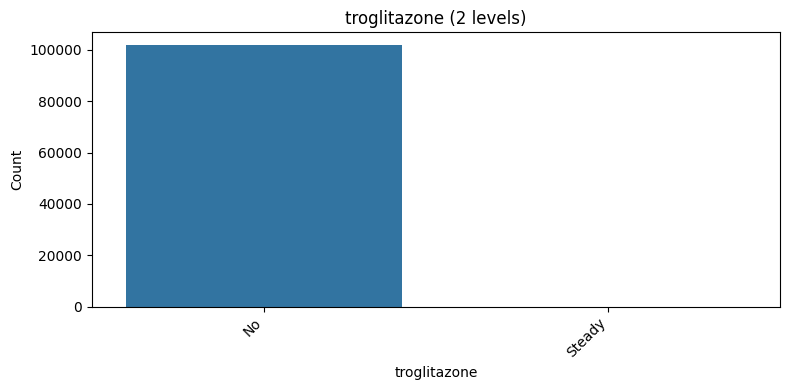

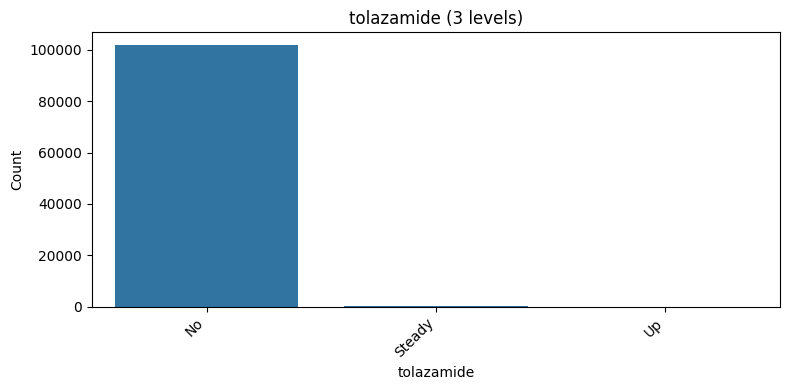

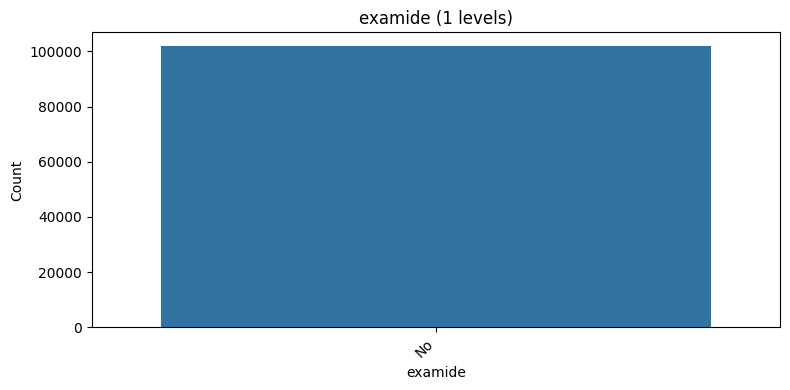

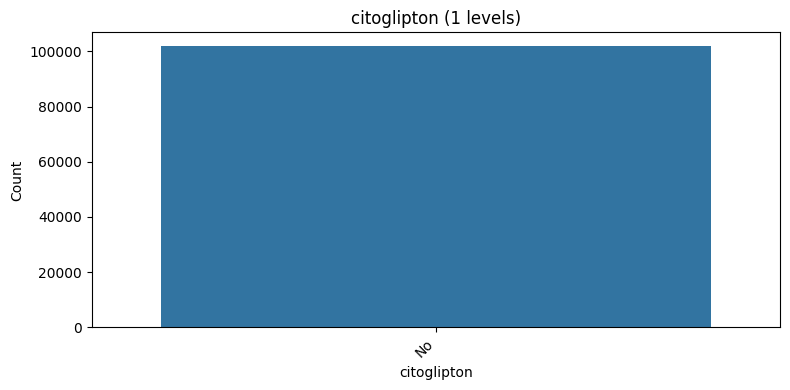

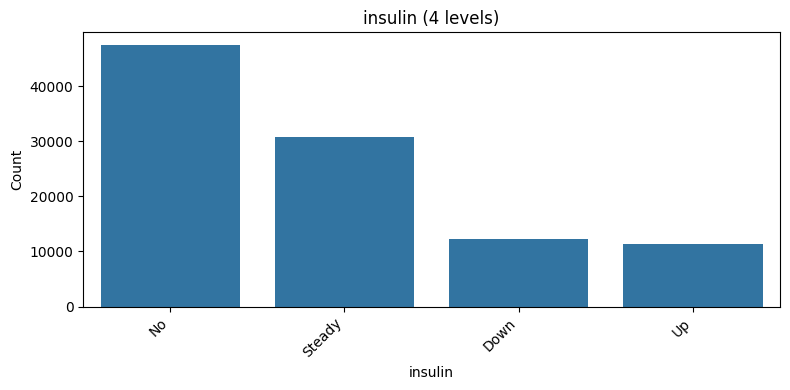

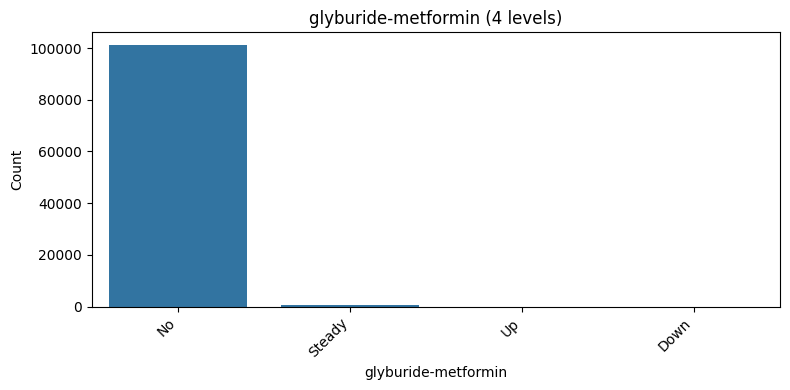

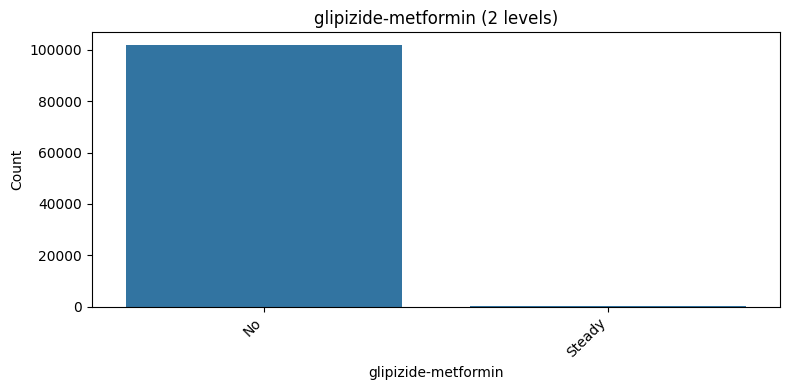

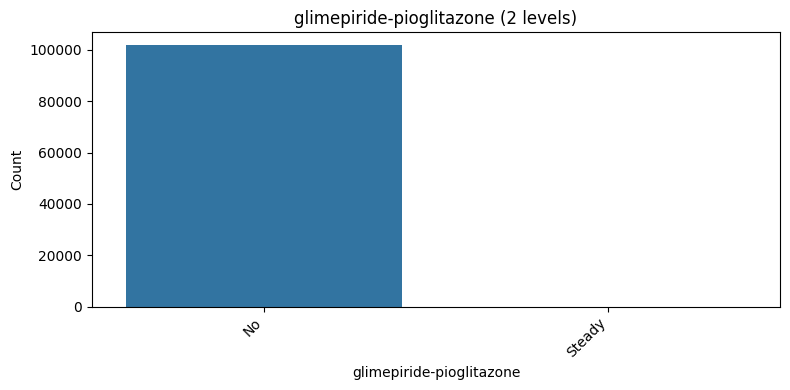

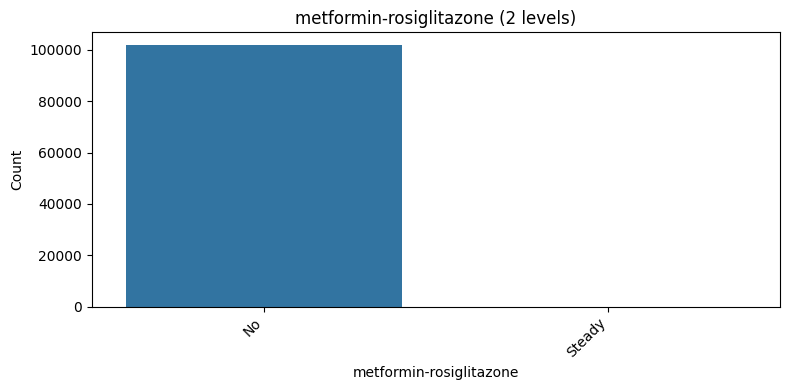

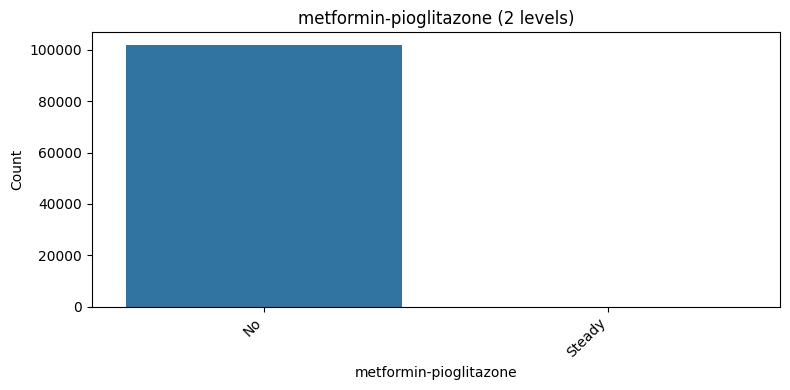

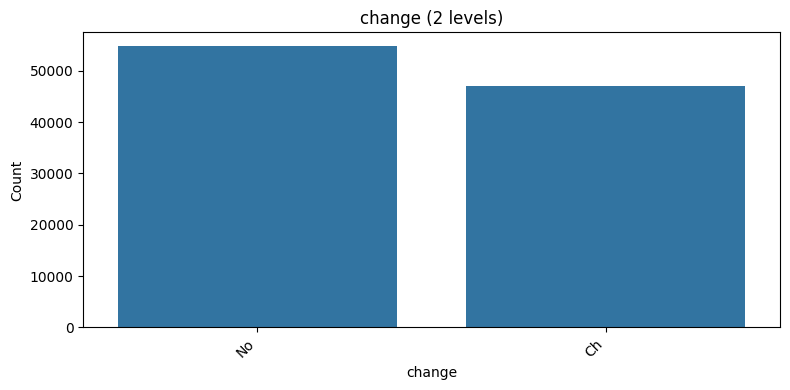

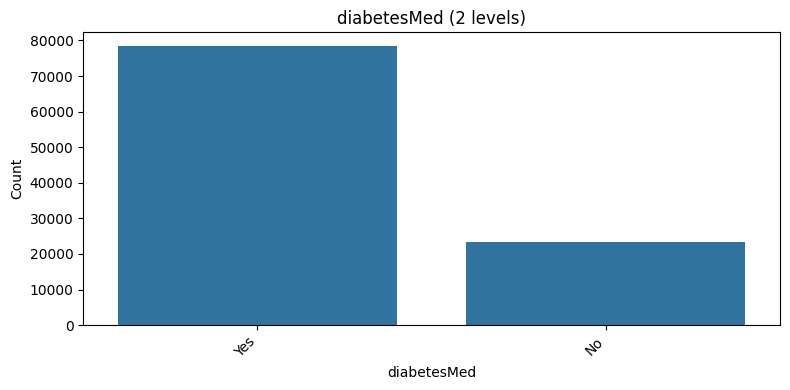

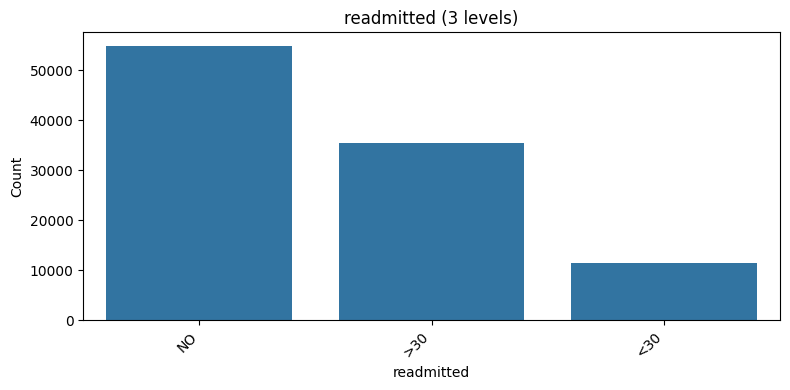

In [5]:
max_categories = 20  # only plot top-N

for col in data.select_dtypes(include='object').columns:
    vc = data[col].value_counts()
    
    if vc.size > max_categories:
        vc = vc.iloc[:max_categories]
        subtitle = f"(top {max_categories} of {data[col].nunique()} levels)"
    else:
        subtitle = f"({vc.size} levels)"
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=vc.index, y=vc.values)
    plt.title(f"{col} {subtitle}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

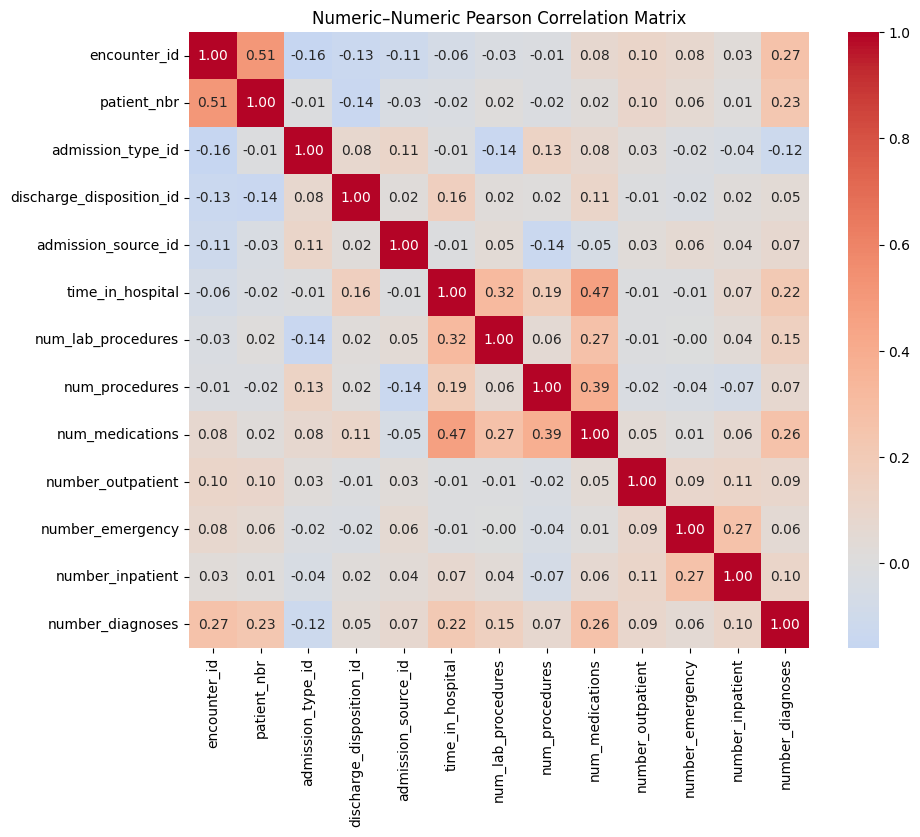

In [6]:
# Bivariate analysis for numerical - numerical columns
# For all the numerical columns, we will plot the a pair plot(scatter plot) and correlation matrix.

# 1. Select the numeric columns as a DataFrame
numeric_df = data.select_dtypes(include='number')

# 2. Compute the Pearson correlation matrix on the numeric DataFrame
corr_matrix = numeric_df.corr(method='pearson')

# 3. Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Numeric–Numeric Pearson Correlation Matrix")
plt.show()

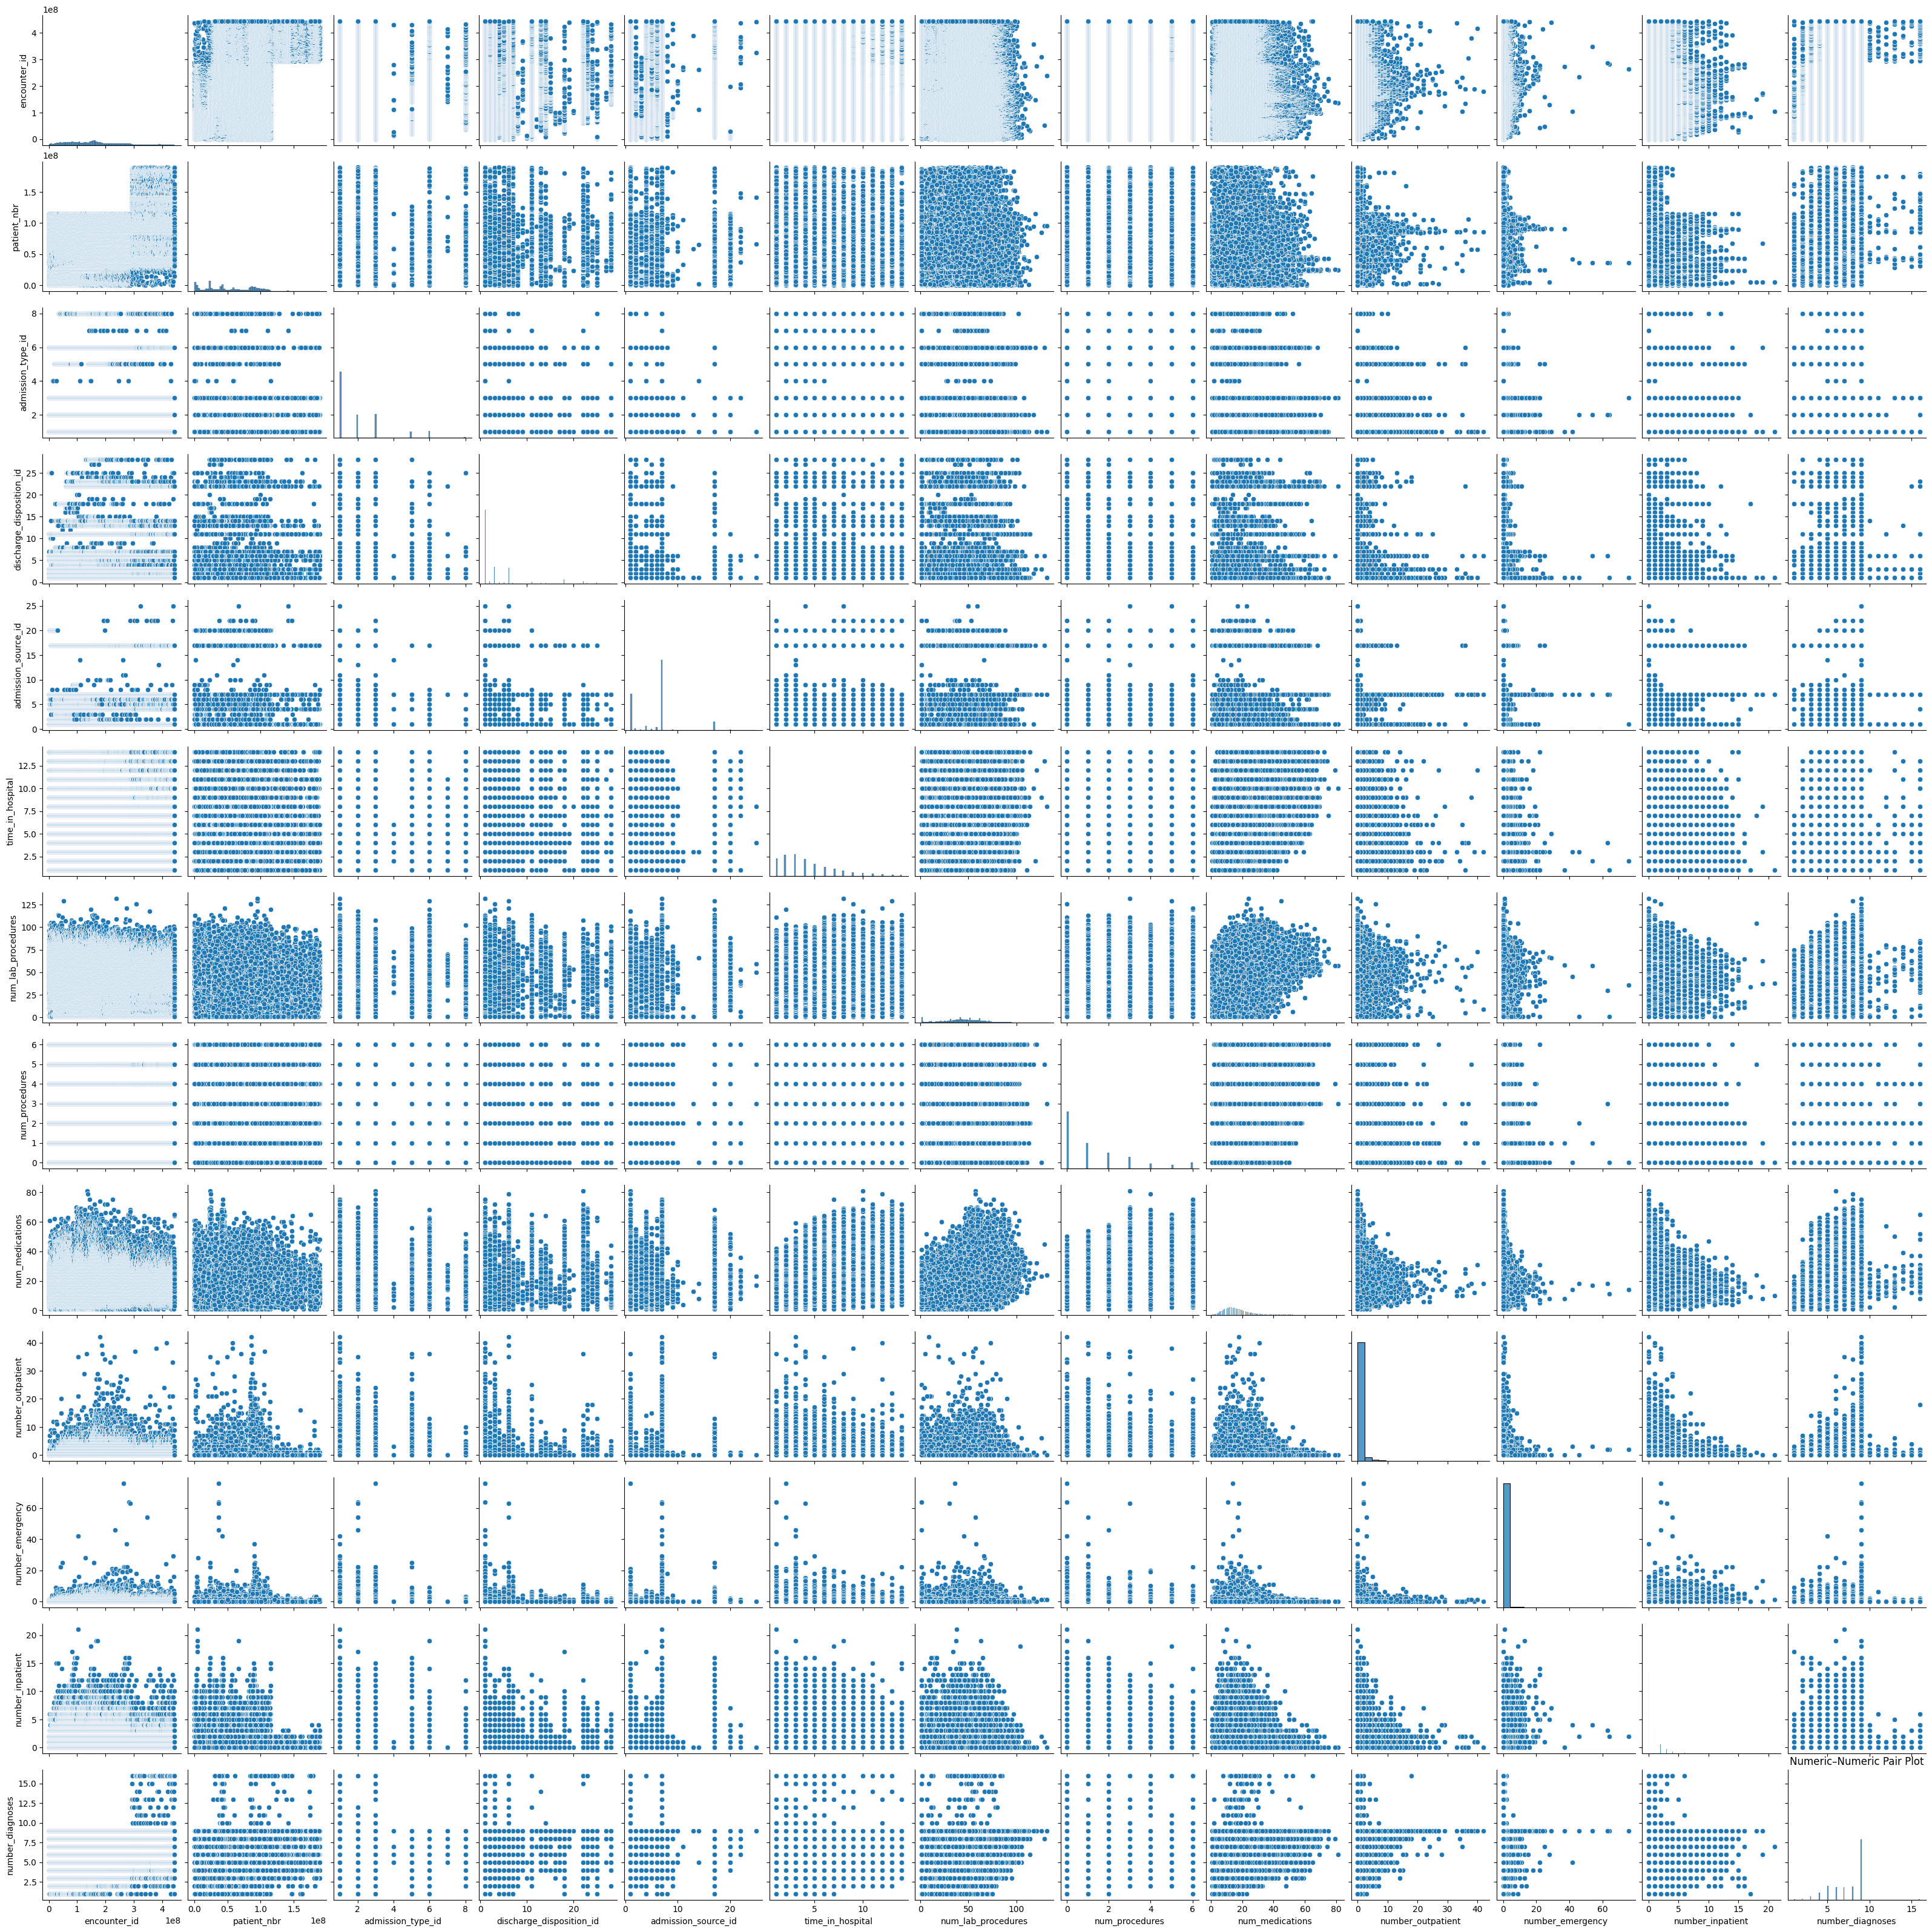

In [7]:
sns.pairplot(data)
plt.title("Numeric–Numeric Pair Plot")
plt.show()

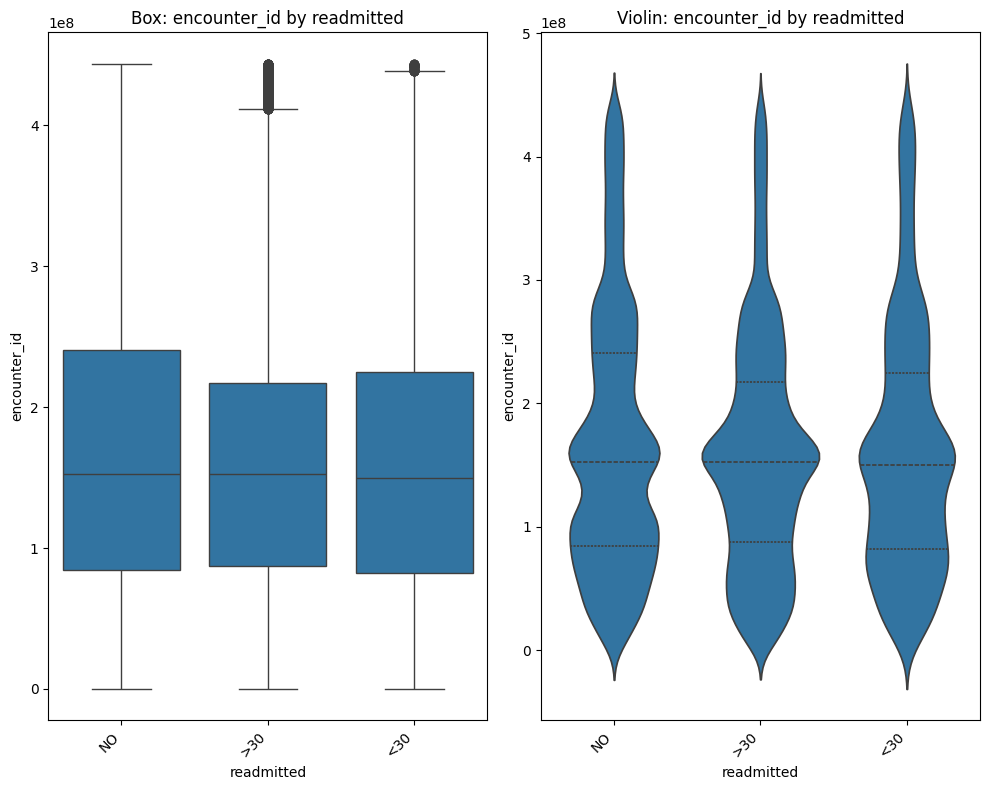

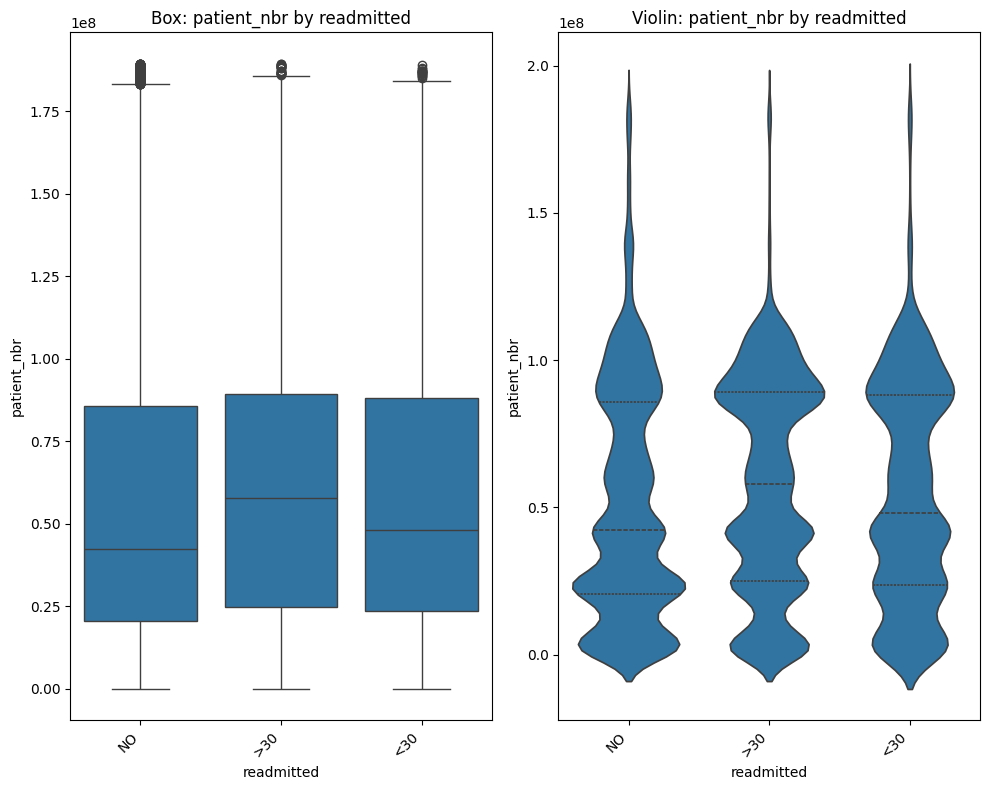

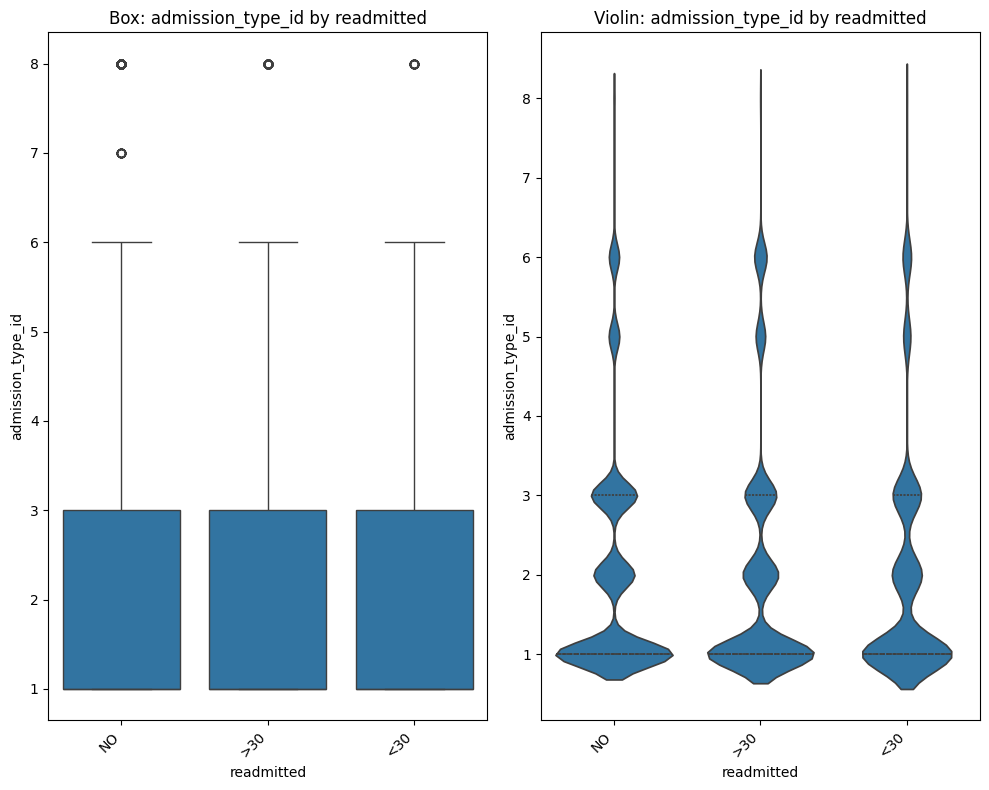

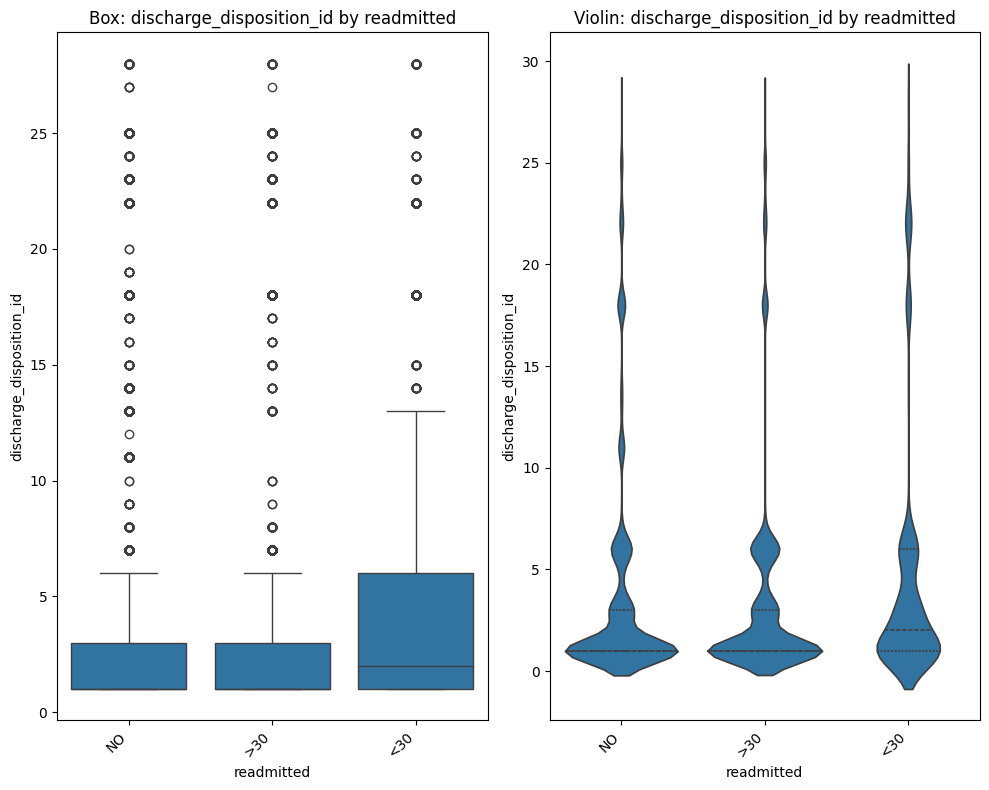

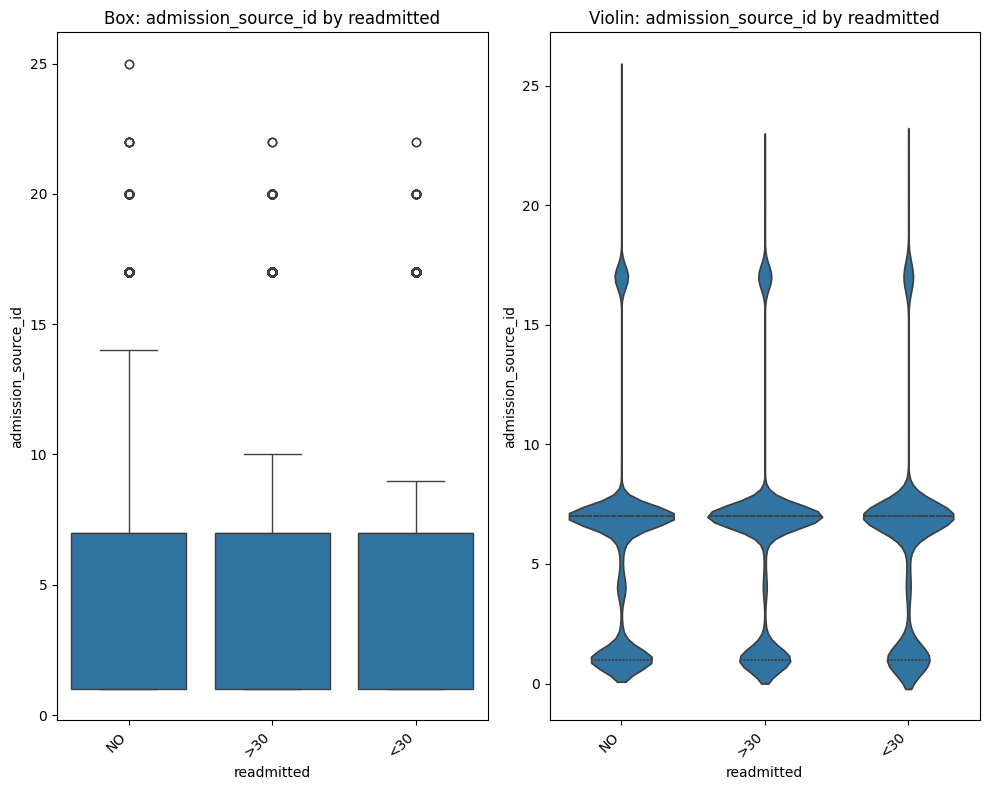

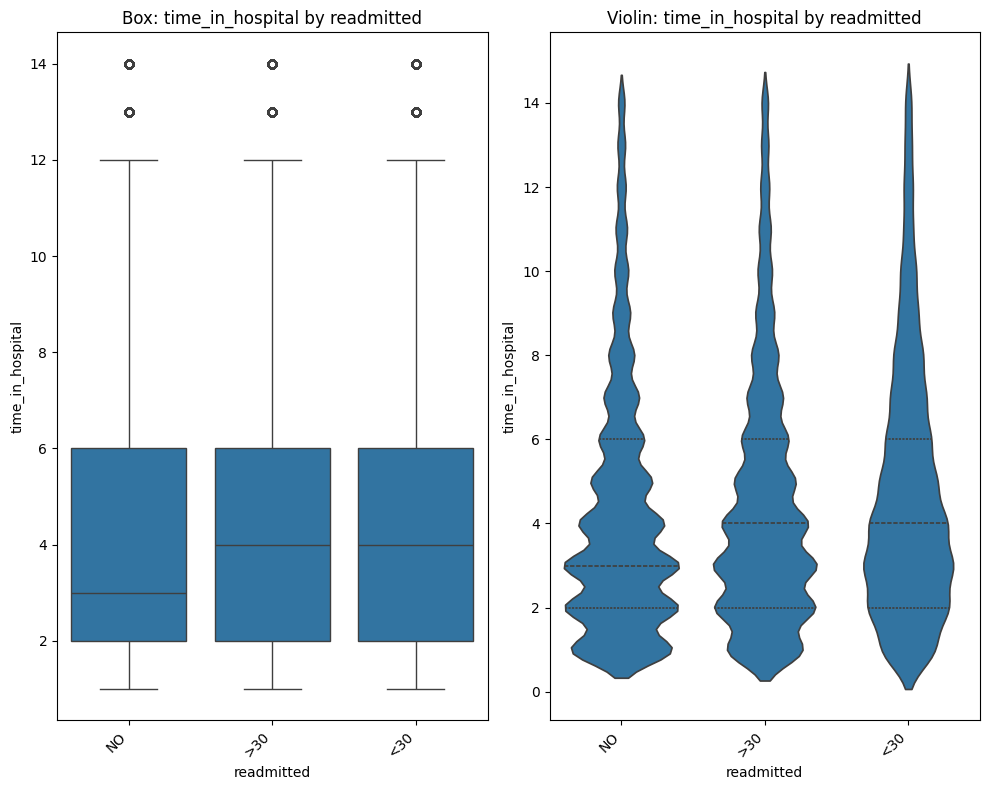

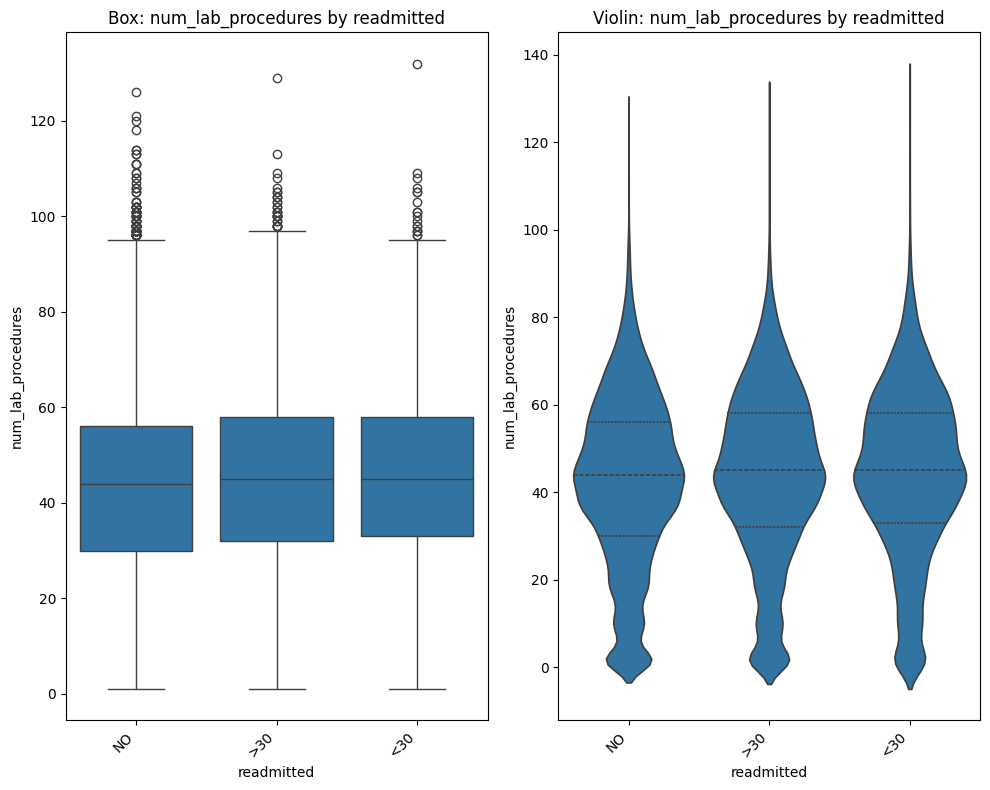

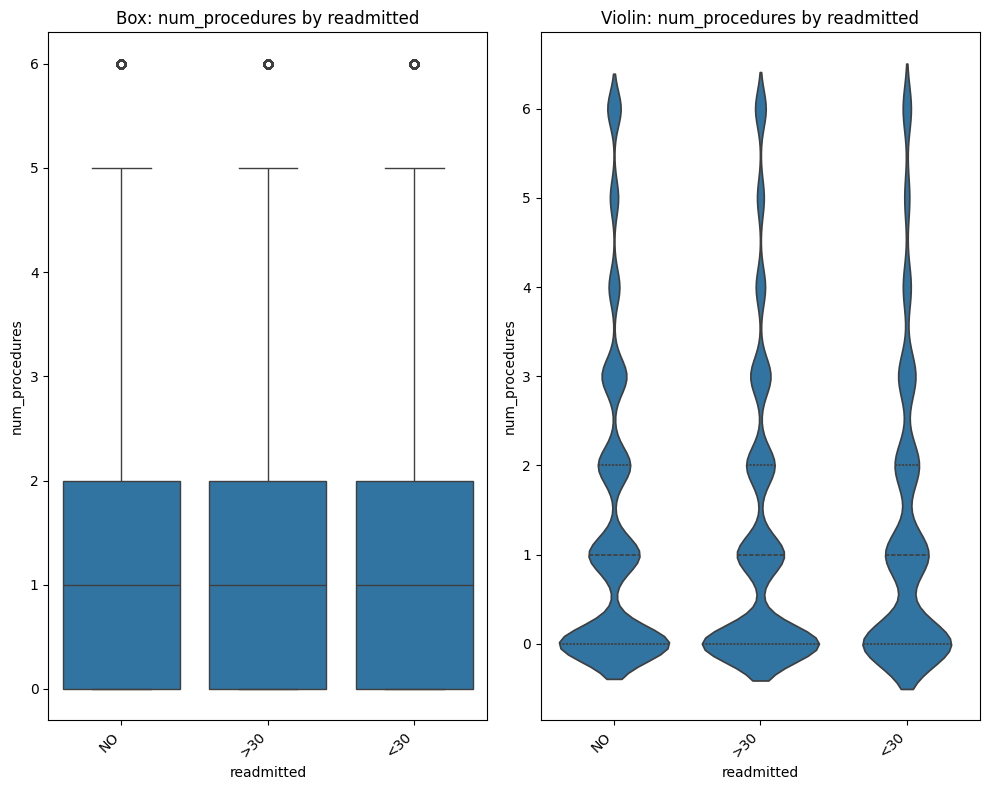

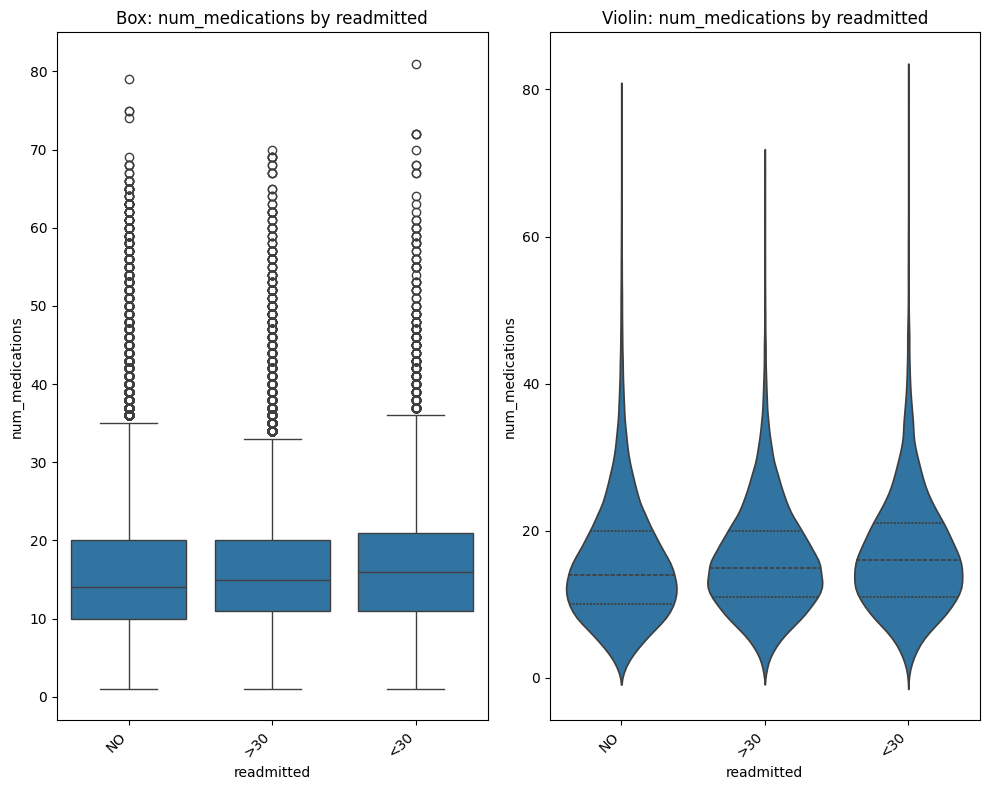

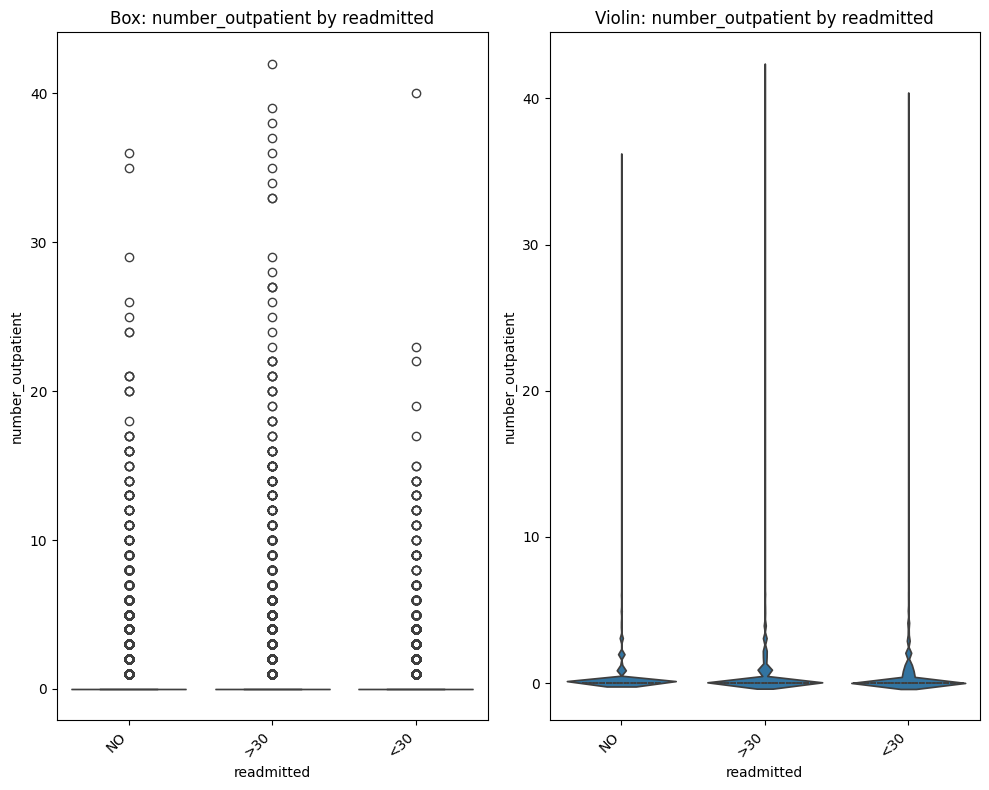

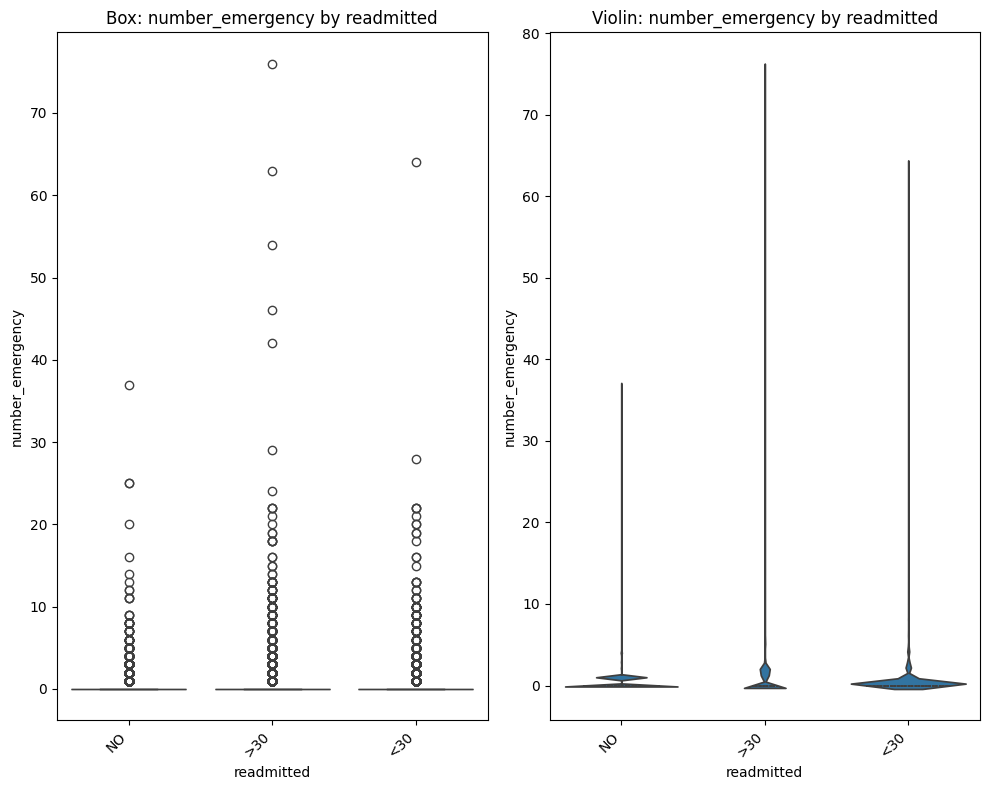

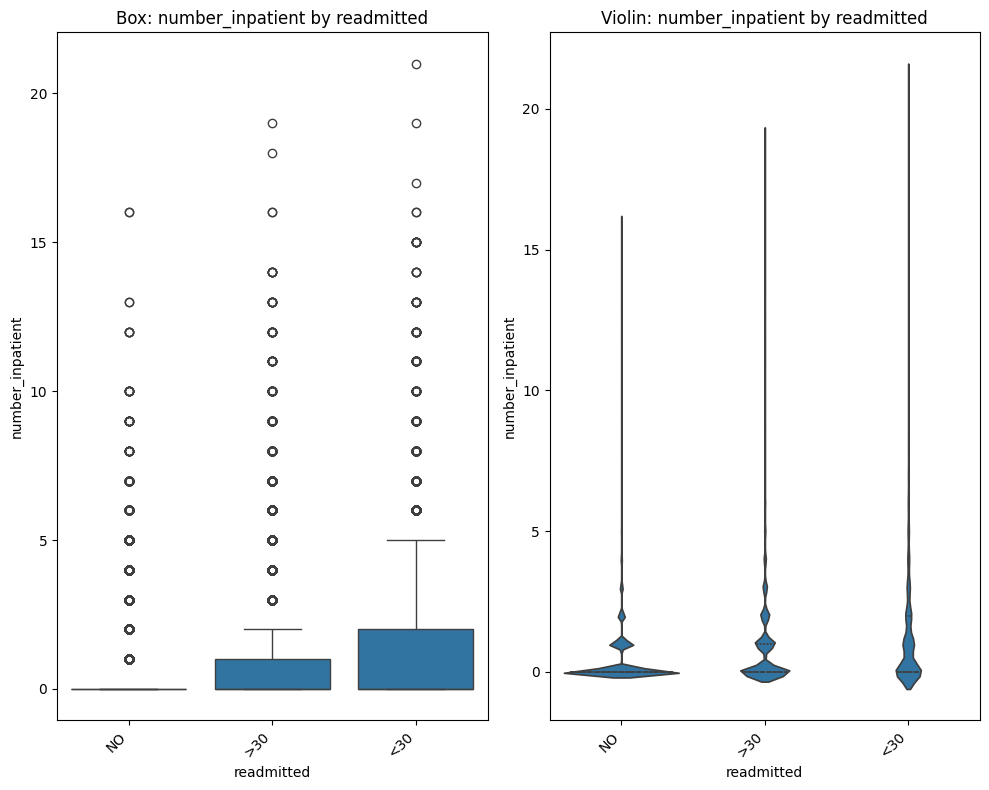

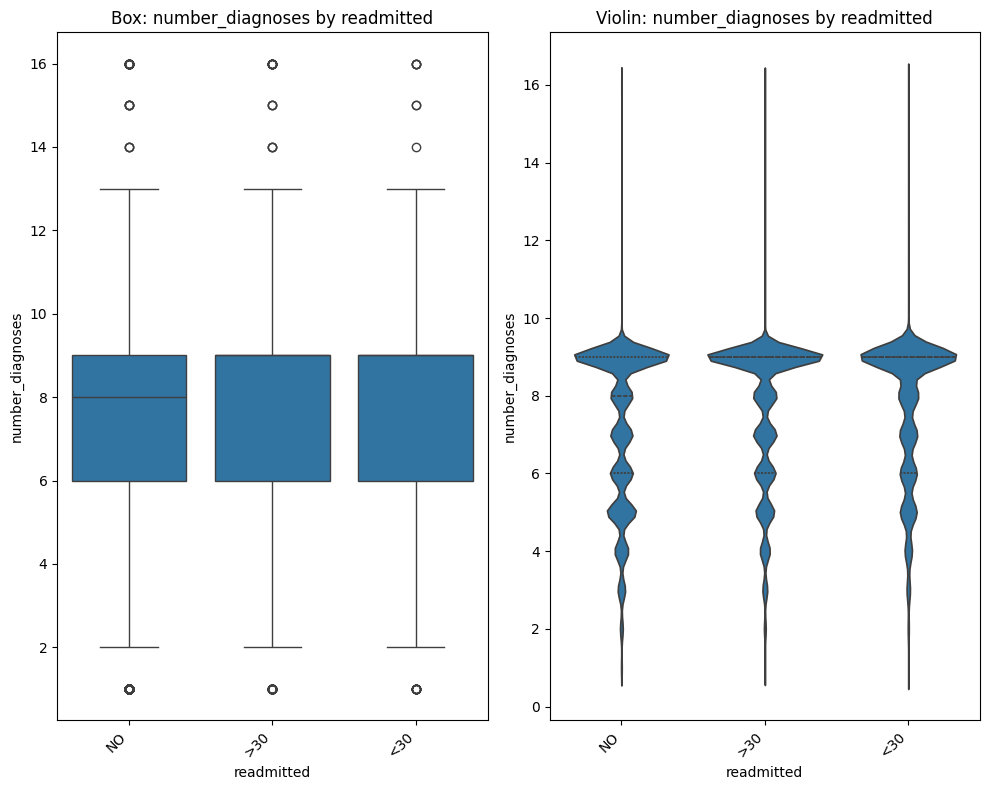

In [8]:
# Bivariate analysis for numerical - categorical columns
# For all the pairs of numerical and categorical columns, we will plot the box plots and violin plots.
# For a categorical feature vs a numerical feature, we will plot the point plot and bar plot.

# 1) Prep numeric and categorical lists
numeric_df = data.select_dtypes(include='number')
categorical_df   = data.select_dtypes(include='object')

for num in numeric_df.columns:
    plt.figure(figsize=(10, 8))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=data['readmitted'], y=num, data=data)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Box: {num} by readmitted")
    plt.xlabel('readmitted')
    plt.ylabel(num)

    plt.subplot(1, 2, 2)
    sns.violinplot(x=data['readmitted'], y=num, data=data, inner='quartile')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Violin: {num} by readmitted")
    plt.xlabel('readmitted')
    plt.ylabel(num)

    plt.tight_layout()
    plt.show()

  


=== race (grouped top 10 + Other) vs readmitted ===
Chi² = 81.9, p = 0.000, Cramér’s V = 0.020

Counts:
 readmitted        <30    >30     NO
race                               
AfricanAmerican  2155   6634  10421
Asian              65    161    415
Caucasian        8780  27662  41930
Hispanic          212    642   1183
Other             145    446    915 

Row-percentages:
 readmitted        <30   >30    NO
race                             
AfricanAmerican  11.2  34.5  54.2
Asian            10.1  25.1  64.7
Caucasian        11.2  35.3  53.5
Hispanic         10.4  31.5  58.1
Other             9.6  29.6  60.8 



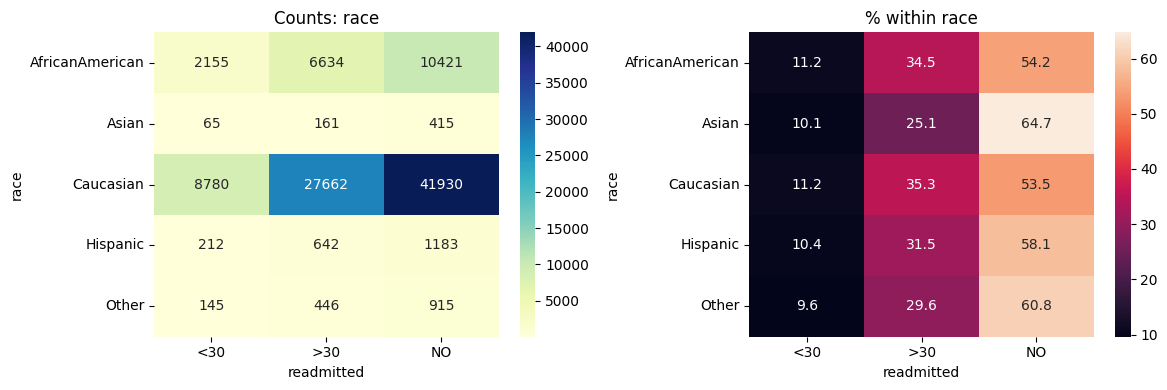


=== gender (grouped top 10 + Other) vs readmitted ===
Chi² = 37.5, p = 0.000, Cramér’s V = 0.014

Counts:
 readmitted        <30    >30     NO
gender                             
Female           6152  19518  29038
Male             5205  16027  25823
Unknown/Invalid     0      0      3 

Row-percentages:
 readmitted        <30   >30     NO
gender                            
Female           11.2  35.7   53.1
Male             11.1  34.1   54.9
Unknown/Invalid   0.0   0.0  100.0 



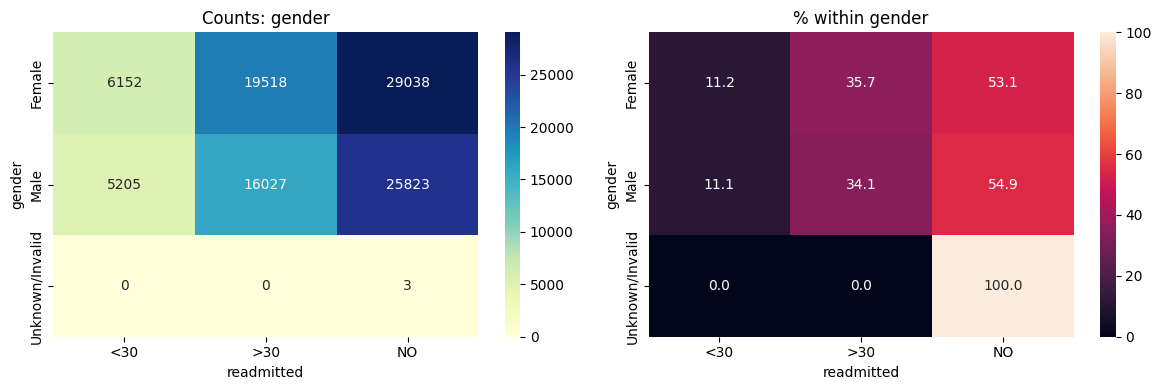


=== age (grouped top 10 + Other) vs readmitted ===
Chi² = 313.2, p = 0.000, Cramér’s V = 0.039

Counts:
 readmitted   <30   >30     NO
age                          
[0-10)         3    26    132
[10-20)       40   224    427
[20-30)      236   510    911
[30-40)      424  1187   2164
[40-50)     1027  3278   5380
[50-60)     1668  5917   9671
[60-70)     2502  7897  12084
[70-80)     3069  9475  13524
[80-90)     2078  6223   8896
[90-100)     310   808   1675 

Row-percentages:
 readmitted   <30   >30    NO
age                         
[0-10)       1.9  16.1  82.0
[10-20)      5.8  32.4  61.8
[20-30)     14.2  30.8  55.0
[30-40)     11.2  31.4  57.3
[40-50)     10.6  33.8  55.5
[50-60)      9.7  34.3  56.0
[60-70)     11.1  35.1  53.7
[70-80)     11.8  36.3  51.9
[80-90)     12.1  36.2  51.7
[90-100)    11.1  28.9  60.0 



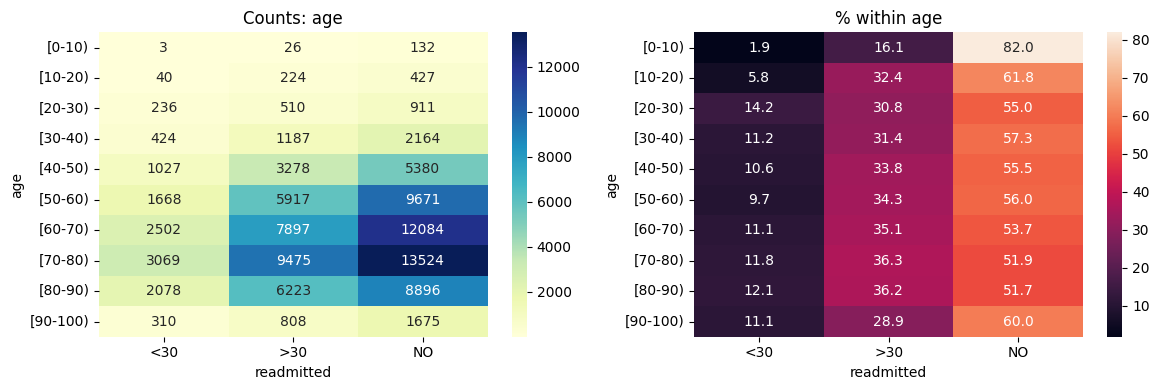


=== payer_code (grouped top 10 + Other) vs readmitted ===
Chi² = 431.6, p = 0.000, Cramér’s V = 0.046

Counts:
 readmitted   <30    >30     NO
payer_code                    
BC           426   1301   2928
CM           198    661   1078
CP           214    781   1538
HM           644   2320   3310
MC          3810  11982  16647
MD           416   1259   1857
OG           136    333    564
Other        149    515    988
SP           510   1869   2628
UN           227    696   1525
unknown     4627  13828  21801 

Row-percentages:
 readmitted   <30   >30    NO
payer_code                  
BC           9.2  27.9  62.9
CM          10.2  34.1  55.7
CP           8.4  30.8  60.7
HM          10.3  37.0  52.8
MC          11.7  36.9  51.3
MD          11.8  35.6  52.6
OG          13.2  32.2  54.6
Other        9.0  31.2  59.8
SP          10.2  37.3  52.5
UN           9.3  28.4  62.3
unknown     11.5  34.4  54.2 



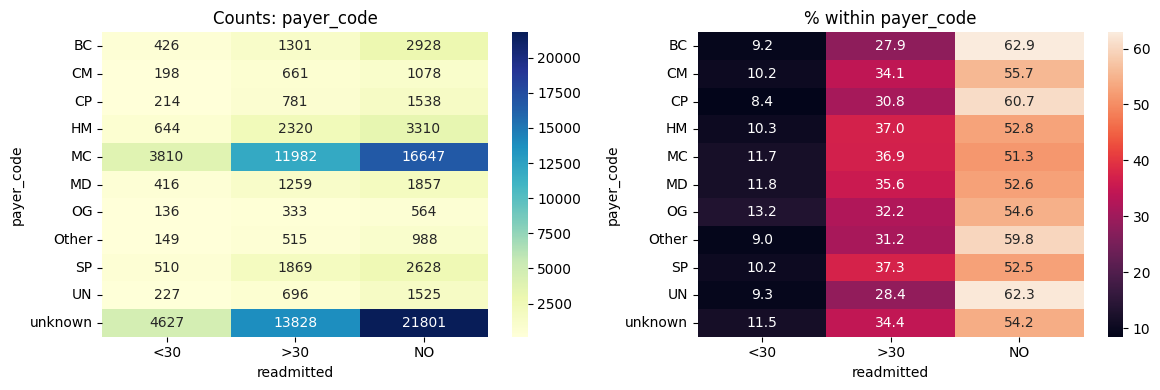


=== medical_specialty (grouped top 10 + Other) vs readmitted ===
Chi² = 766.3, p = 0.000, Cramér’s V = 0.061

Counts:
 readmitted                   <30    >30     NO
medical_specialty                             
Cardiology                   425   1853   3074
Emergency/Trauma             846   3006   3713
Family/GeneralPractice       883   2663   3894
InternalMedicine            1646   4723   8266
Nephrology                   248    666    699
Orthopedics                  151    327    922
Orthopedics-Reconstructive    92    293    848
Other                        840   2369   5131
Radiologist                  103    383    654
Surgery-General              342   1046   1711
unknown                     5781  18216  25952 

Row-percentages:
 readmitted                   <30   >30    NO
medical_specialty                           
Cardiology                   7.9  34.6  57.4
Emergency/Trauma            11.2  39.7  49.1
Family/GeneralPractice      11.9  35.8  52.3
InternalMedicine        

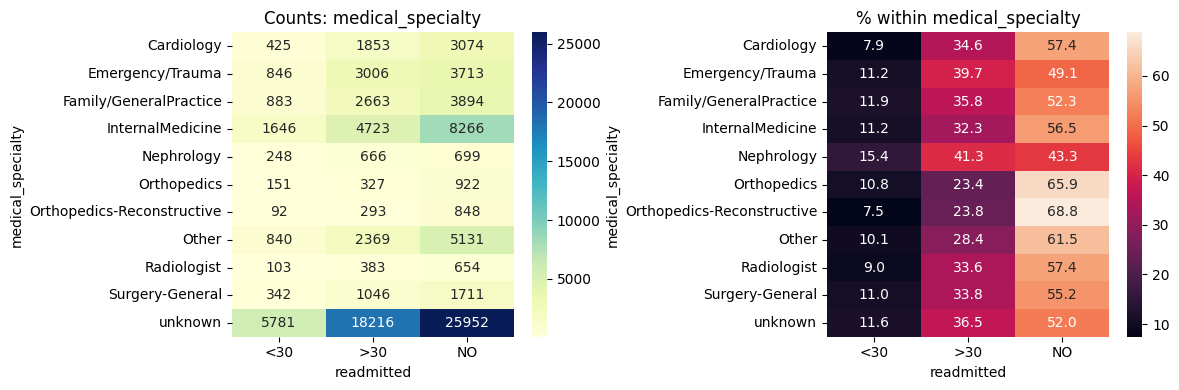


=== diag_1 (grouped top 10 + Other) vs readmitted ===
Chi² = 1075.0, p = 0.000, Cramér’s V = 0.073

Counts:
 readmitted   <30    >30     NO
diag_1                        
410          373   1065   2176
414          595   2125   3861
427          252    974   1540
428          968   3089   2805
434          329    588   1111
486          314   1369   1825
491          287   1073    915
682          183    774   1085
715          215    568   1368
786          291   1418   2307
Other       7550  22502  35871 

Row-percentages:
 readmitted   <30   >30    NO
diag_1                      
410         10.3  29.5  60.2
414          9.0  32.3  58.7
427          9.1  35.2  55.7
428         14.1  45.0  40.9
434         16.2  29.0  54.8
486          9.0  39.0  52.0
491         12.6  47.2  40.2
682          9.0  37.9  53.1
715         10.0  26.4  63.6
786          7.2  35.3  57.4
Other       11.5  34.1  54.4 



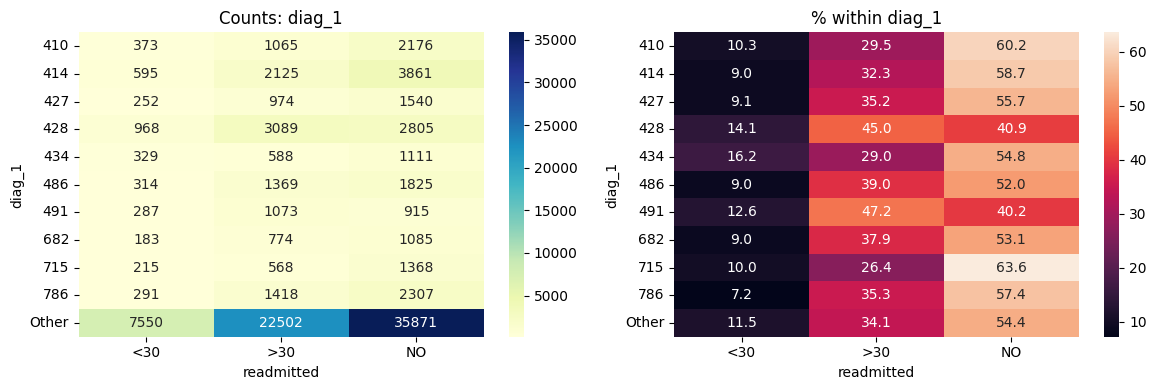


=== diag_2 (grouped top 10 + Other) vs readmitted ===
Chi² = 978.4, p = 0.000, Cramér’s V = 0.069

Counts:
 readmitted   <30    >30     NO
diag_2                        
250          446   1680   3945
276          810   2392   3550
401          268   1035   2433
403          429   1286   1108
411          249    923   1394
414          220    899   1531
427          563   1829   2644
428          842   2680   3140
496          368   1341   1596
599          371   1163   1754
Other       6791  20317  31769 

Row-percentages:
 readmitted   <30   >30    NO
diag_2                      
250          7.3  27.7  65.0
276         12.0  35.4  52.6
401          7.2  27.7  65.1
403         15.2  45.6  39.2
411          9.7  36.0  54.3
414          8.3  33.9  57.8
427         11.2  36.3  52.5
428         12.6  40.2  47.1
496         11.1  40.6  48.3
599         11.3  35.4  53.3
Other       11.5  34.5  54.0 



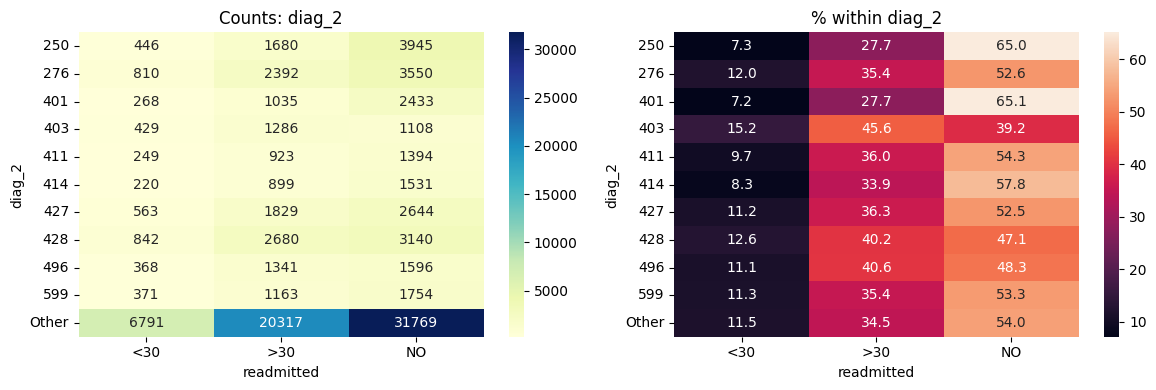


=== diag_3 (grouped top 10 + Other) vs readmitted ===
Chi² = 1043.0, p = 0.000, Cramér’s V = 0.072

Counts:
 readmitted   <30    >30     NO
diag_3                        
250          984   3566   7005
272          135    562   1272
276          603   1791   2781
401          688   2485   5116
403          385    987    985
414          338   1351   1975
427          459   1504   1992
428          560   1872   2145
496          350    999   1256
585          336    855    801
Other       6519  19573  29536 

Row-percentages:
 readmitted   <30   >30    NO
diag_3                      
250          8.5  30.9  60.6
272          6.9  28.5  64.6
276         11.7  34.6  53.7
401          8.3  30.0  61.7
403         16.3  41.9  41.8
414          9.2  36.9  53.9
427         11.6  38.0  50.4
428         12.2  40.9  46.9
496         13.4  38.3  48.2
585         16.9  42.9  40.2
Other       11.7  35.2  53.1 



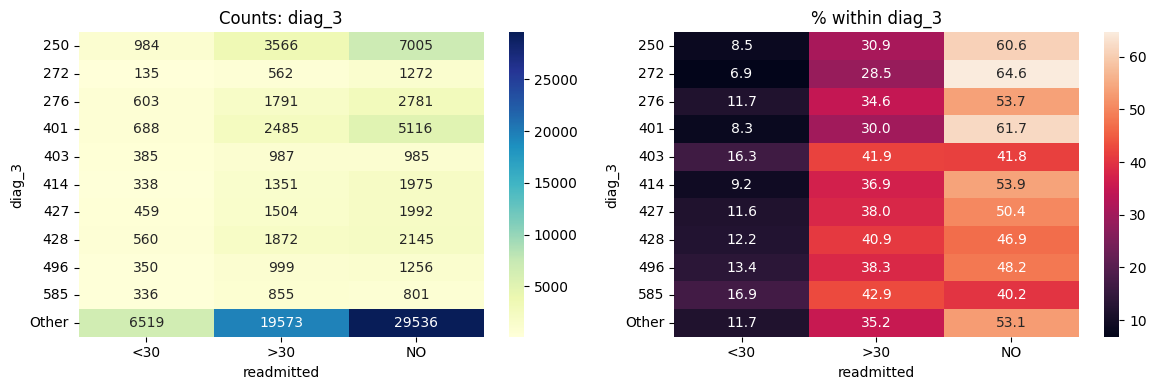


=== max_glu_serum (grouped top 10 + Other) vs readmitted ===
Chi² = 51.9, p = 0.000, Cramér’s V = 0.016

Counts:
 readmitted       <30    >30     NO
max_glu_serum                     
>200             185    530    770
>300             181    521    562
Norm             295    885   1417
Not Taken      10696  33609  52115 

Row-percentages:
 readmitted      <30   >30    NO
max_glu_serum                  
>200           12.5  35.7  51.9
>300           14.3  41.2  44.5
Norm           11.4  34.1  54.6
Not Taken      11.1  34.9  54.0 



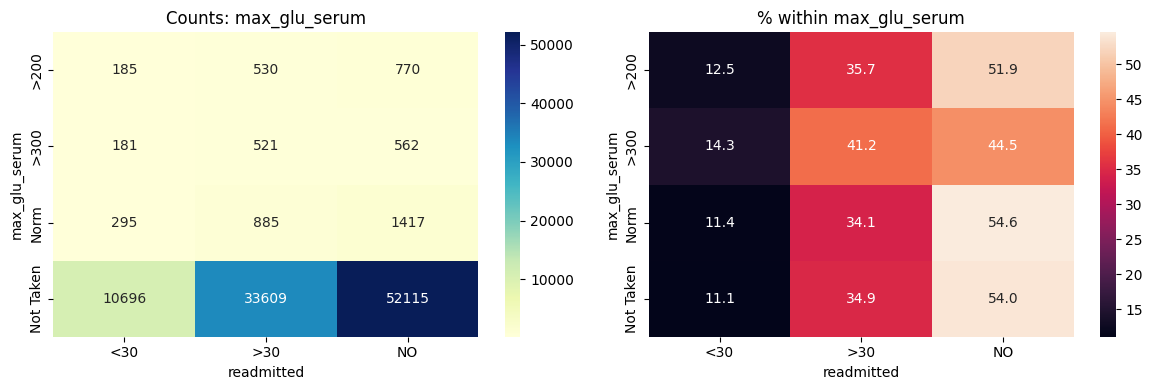


=== A1Cresult (grouped top 10 + Other) vs readmitted ===
Chi² = 70.1, p = 0.000, Cramér’s V = 0.019

Counts:
 readmitted   <30    >30     NO
A1Cresult                     
>7           383   1300   2129
>8           811   2901   4504
Norm         482   1599   2909
Not Taken   9681  29745  45322 

Row-percentages:
 readmitted   <30   >30    NO
A1Cresult                   
>7          10.0  34.1  55.8
>8           9.9  35.3  54.8
Norm         9.7  32.0  58.3
Not Taken   11.4  35.1  53.5 



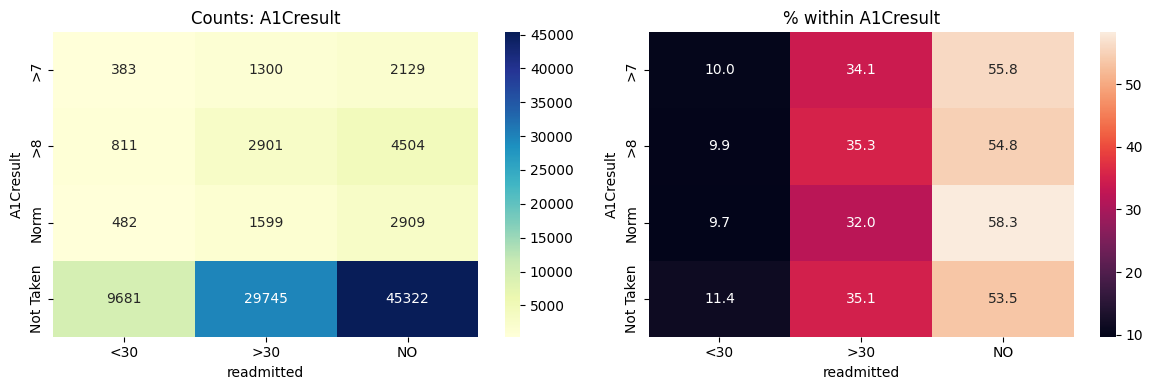


=== metformin (grouped top 10 + Other) vs readmitted ===
Chi² = 104.8, p = 0.000, Cramér’s V = 0.023

Counts:
 readmitted   <30    >30     NO
metformin                     
Down          69    190    316
No          9418  28839  43521
Steady      1782   6169  10395
Up            88    347    632 

Row-percentages:
 readmitted   <30   >30    NO
metformin                   
Down        12.0  33.0  55.0
No          11.5  35.3  53.2
Steady       9.7  33.6  56.7
Up           8.2  32.5  59.2 



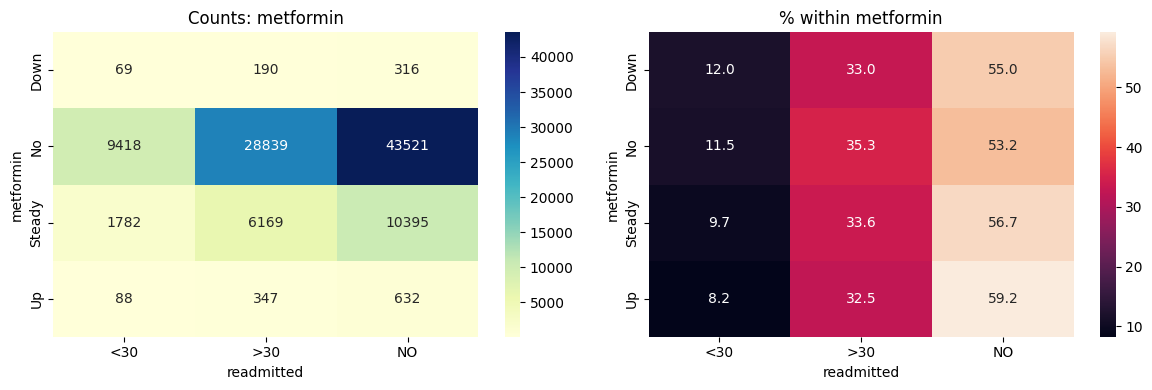


=== repaglinide (grouped top 10 + Other) vs readmitted ===
Chi² = 59.0, p = 0.000, Cramér’s V = 0.017

Counts:
 readmitted     <30    >30     NO
repaglinide                     
Down             3     19     23
No           11152  34905  54170
Steady         182    588    614
Up              20     33     57 

Row-percentages:
 readmitted    <30   >30    NO
repaglinide                  
Down          6.7  42.2  51.1
No           11.1  34.8  54.0
Steady       13.2  42.5  44.4
Up           18.2  30.0  51.8 



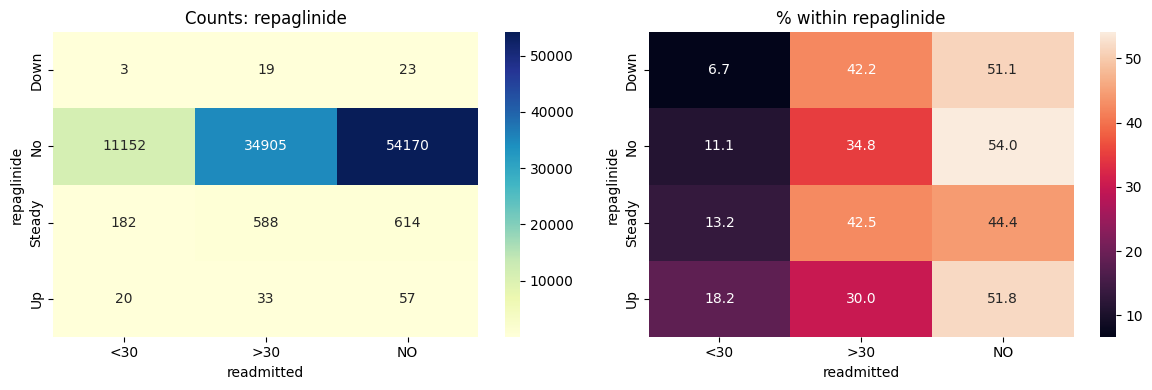


=== nateglinide (grouped top 10 + Other) vs readmitted ===
Chi² = 3.4, p = 0.754, Cramér’s V = 0.004

Counts:
 readmitted     <30    >30     NO
nateglinide                     
Down             1      4      6
No           11277  35283  54503
Steady          78    248    342
Up               1     10     13 

Row-percentages:
 readmitted    <30   >30    NO
nateglinide                  
Down          9.1  36.4  54.5
No           11.2  34.9  53.9
Steady       11.7  37.1  51.2
Up            4.2  41.7  54.2 



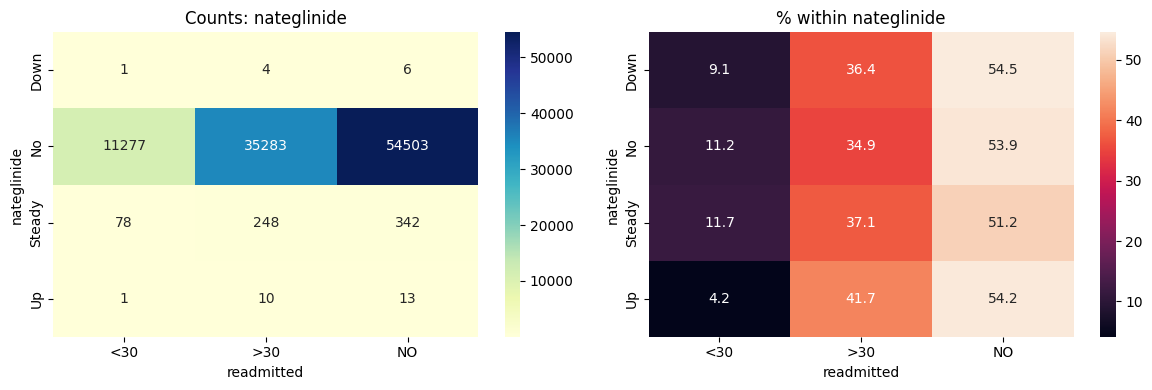


=== chlorpropamide (grouped top 10 + Other) vs readmitted ===
Chi² = 9.0, p = 0.176, Cramér’s V = 0.007

Counts:
 readmitted        <30    >30     NO
chlorpropamide                     
Down                0      0      1
No              11352  35511  54817
Steady              5     29     45
Up                  0      5      1 

Row-percentages:
 readmitted       <30   >30     NO
chlorpropamide                   
Down             0.0   0.0  100.0
No              11.2  34.9   53.9
Steady           6.3  36.7   57.0
Up               0.0  83.3   16.7 



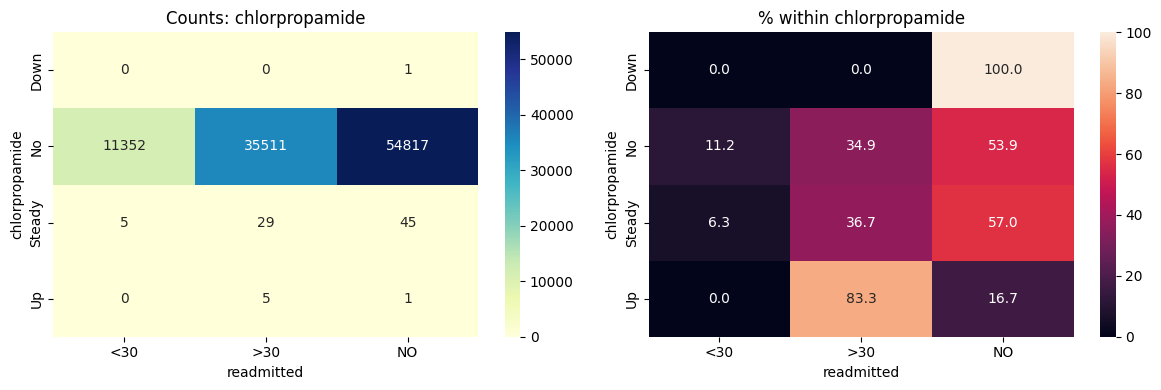


=== glimepiride (grouped top 10 + Other) vs readmitted ===
Chi² = 16.7, p = 0.011, Cramér’s V = 0.009

Counts:
 readmitted     <30    >30     NO
glimepiride                     
Down            25     68    101
No           10827  33638  52110
Steady         468   1737   2465
Up              37    102    188 

Row-percentages:
 readmitted    <30   >30    NO
glimepiride                  
Down         12.9  35.1  52.1
No           11.2  34.8  54.0
Steady       10.0  37.2  52.8
Up           11.3  31.2  57.5 



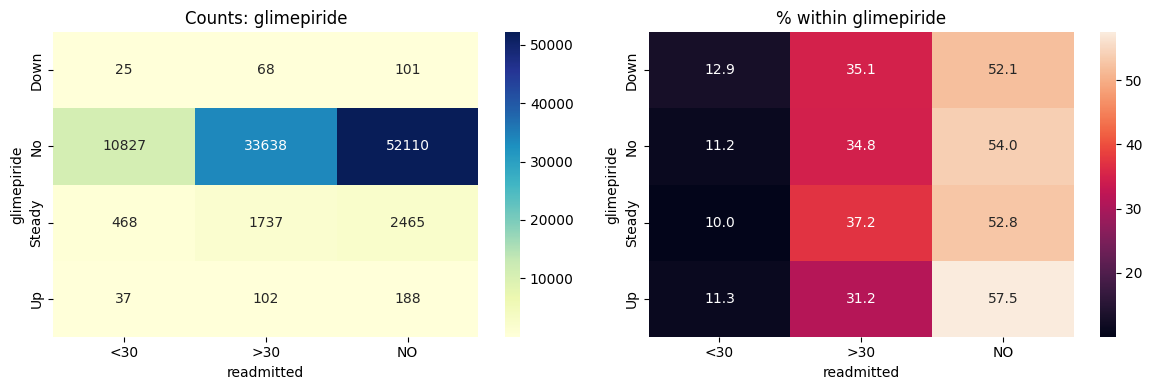


=== acetohexamide (grouped top 10 + Other) vs readmitted ===
Chi² = 1.9, p = 0.394, Cramér’s V = 0.004

Counts:
 readmitted       <30    >30     NO
acetohexamide                     
No             11357  35544  54864
Steady             0      1      0 

Row-percentages:
 readmitted      <30    >30    NO
acetohexamide                   
No             11.2   34.9  53.9
Steady          0.0  100.0   0.0 



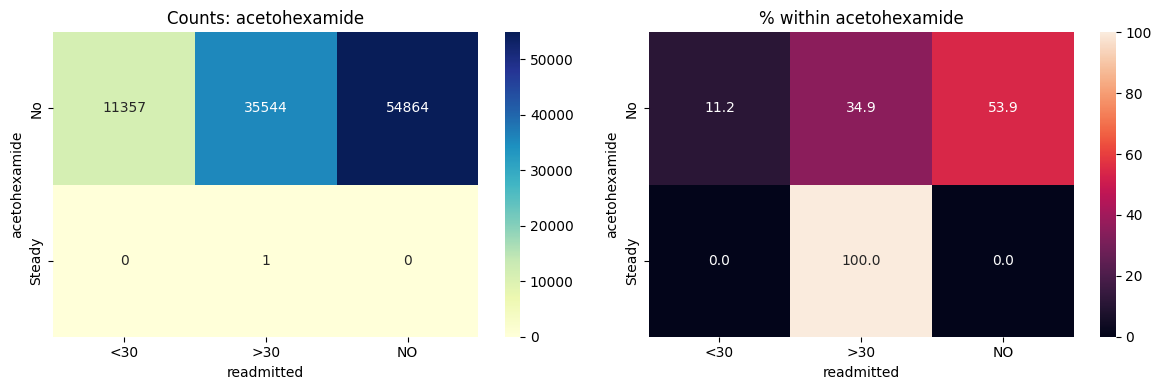


=== glipizide (grouped top 10 + Other) vs readmitted ===
Chi² = 54.3, p = 0.000, Cramér’s V = 0.016

Counts:
 readmitted   <30    >30     NO
glipizide                     
Down          85    211    264
No          9905  30815  48360
Steady      1268   4233   5855
Up            99    286    385 

Row-percentages:
 readmitted   <30   >30    NO
glipizide                   
Down        15.2  37.7  47.1
No          11.1  34.6  54.3
Steady      11.2  37.3  51.6
Up          12.9  37.1  50.0 



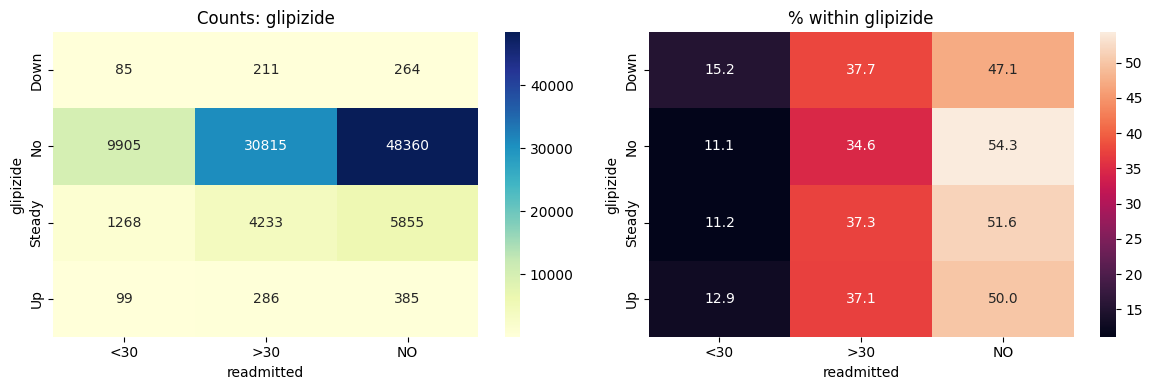


=== glyburide (grouped top 10 + Other) vs readmitted ===
Chi² = 10.0, p = 0.125, Cramér’s V = 0.007

Counts:
 readmitted    <30    >30     NO
glyburide                      
Down           52    223    289
No          10225  31827  49064
Steady        995   3221   5058
Up             85    274    453 

Row-percentages:
 readmitted   <30   >30    NO
glyburide                   
Down         9.2  39.5  51.2
No          11.2  34.9  53.8
Steady      10.7  34.7  54.5
Up          10.5  33.7  55.8 



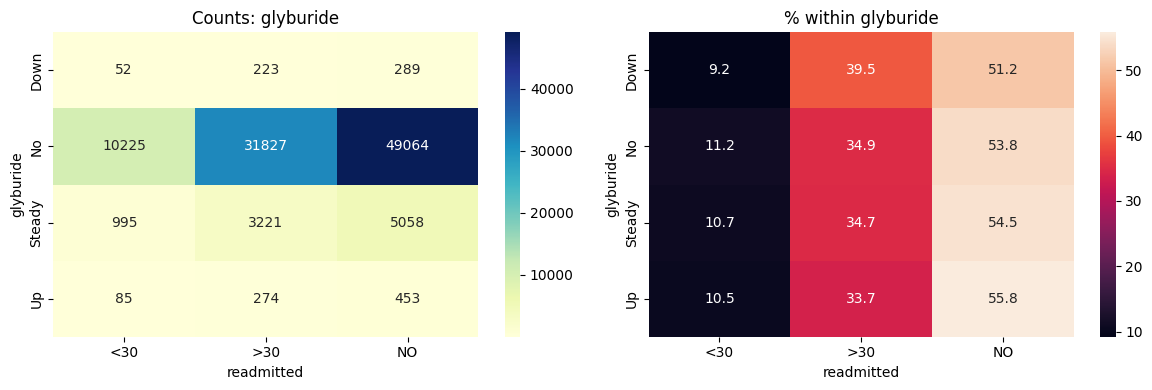


=== tolbutamide (grouped top 10 + Other) vs readmitted ===
Chi² = 1.6, p = 0.442, Cramér’s V = 0.004

Counts:
 readmitted     <30    >30     NO
tolbutamide                     
No           11356  35538  54849
Steady           1      7     15 

Row-percentages:
 readmitted    <30   >30    NO
tolbutamide                  
No           11.2  34.9  53.9
Steady        4.3  30.4  65.2 



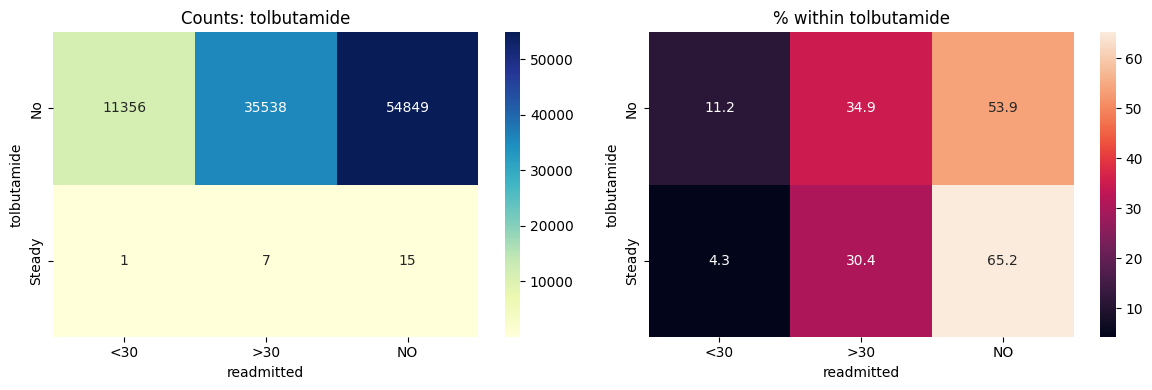


=== pioglitazone (grouped top 10 + Other) vs readmitted ===
Chi² = 29.9, p = 0.000, Cramér’s V = 0.012

Counts:
 readmitted      <30    >30     NO
pioglitazone                     
Down             18     45     55
No            10583  32788  51067
Steady          727   2620   3629
Up               29     92    113 

Row-percentages:
 readmitted     <30   >30    NO
pioglitazone                  
Down          15.3  38.1  46.6
No            11.2  34.7  54.1
Steady        10.4  37.6  52.0
Up            12.4  39.3  48.3 



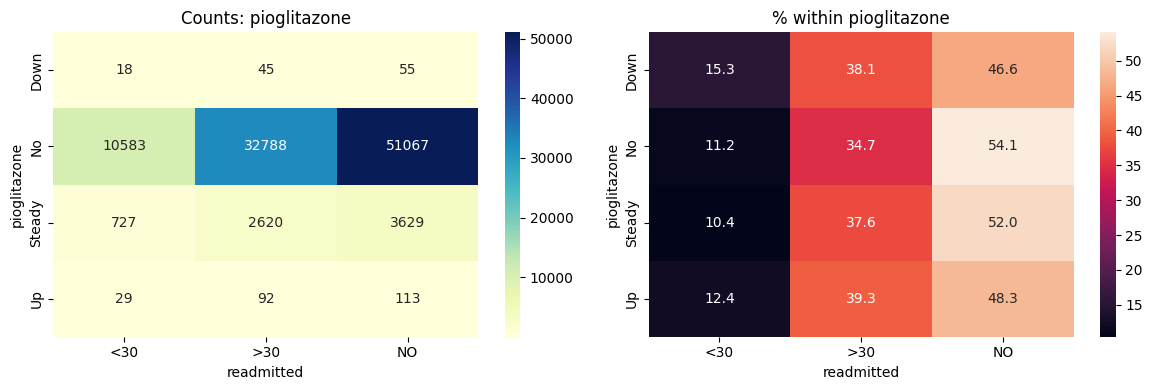


=== rosiglitazone (grouped top 10 + Other) vs readmitted ===
Chi² = 43.0, p = 0.000, Cramér’s V = 0.015

Counts:
 readmitted       <30    >30     NO
rosiglitazone                     
Down               5     22     60
No             10692  33136  51573
Steady           641   2335   3124
Up                19     52    107 

Row-percentages:
 readmitted      <30   >30    NO
rosiglitazone                  
Down            5.7  25.3  69.0
No             11.2  34.7  54.1
Steady         10.5  38.3  51.2
Up             10.7  29.2  60.1 



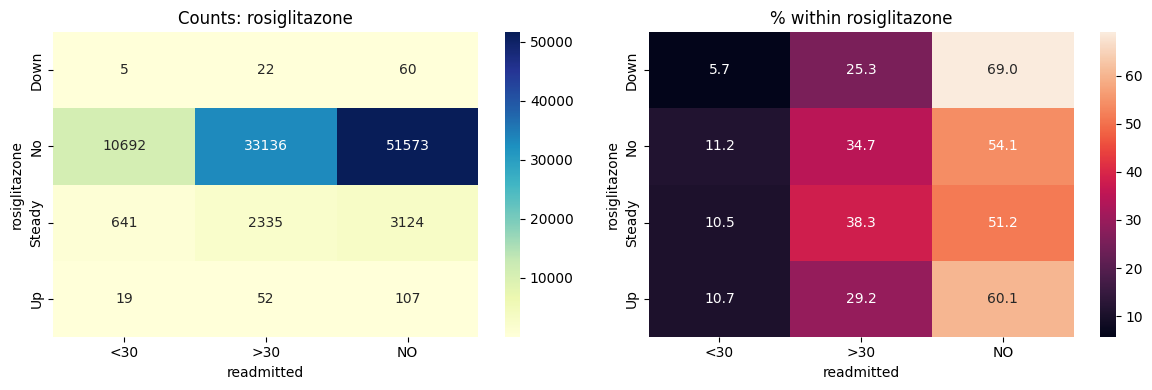


=== acarbose (grouped top 10 + Other) vs readmitted ===
Chi² = 35.7, p = 0.000, Cramér’s V = 0.013

Counts:
 readmitted    <30    >30     NO
acarbose                       
Down            1      1      1
No          11329  35390  54739
Steady         25    150    120
Up              2      4      4 

Row-percentages:
 readmitted   <30   >30    NO
acarbose                    
Down        33.3  33.3  33.3
No          11.2  34.9  54.0
Steady       8.5  50.8  40.7
Up          20.0  40.0  40.0 



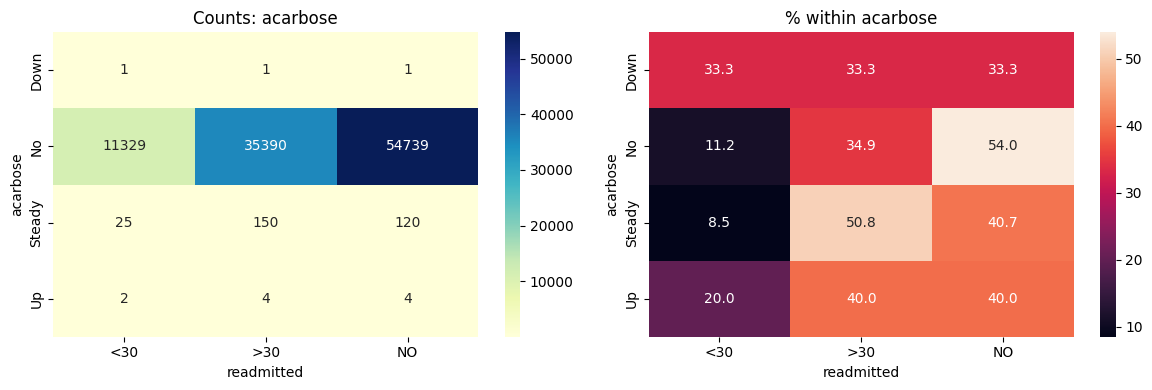


=== miglitol (grouped top 10 + Other) vs readmitted ===
Chi² = 11.6, p = 0.072, Cramér’s V = 0.008

Counts:
 readmitted    <30    >30     NO
miglitol                       
Down            2      3      0
No          11353  35525  54850
Steady          2     16     13
Up              0      1      1 

Row-percentages:
 readmitted   <30   >30    NO
miglitol                    
Down        40.0  60.0   0.0
No          11.2  34.9  53.9
Steady       6.5  51.6  41.9
Up           0.0  50.0  50.0 



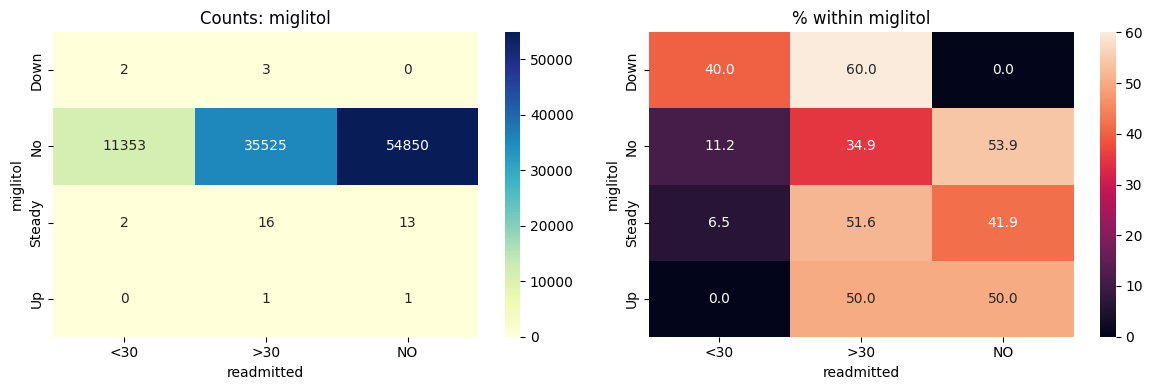


=== troglitazone (grouped top 10 + Other) vs readmitted ===
Chi² = 1.4, p = 0.488, Cramér’s V = 0.004

Counts:
 readmitted      <30    >30     NO
troglitazone                     
No            11357  35543  54863
Steady            0      2      1 

Row-percentages:
 readmitted     <30   >30    NO
troglitazone                  
No            11.2  34.9  53.9
Steady         0.0  66.7  33.3 



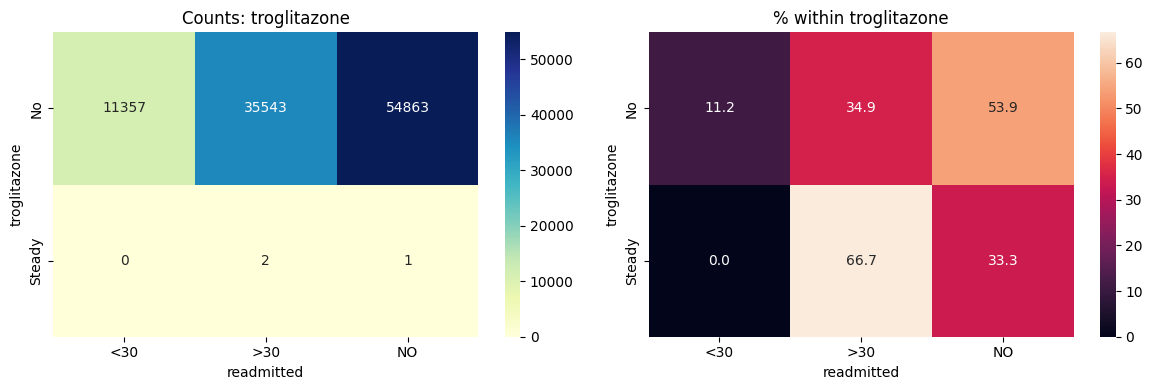


=== tolazamide (grouped top 10 + Other) vs readmitted ===
Chi² = 5.1, p = 0.279, Cramér’s V = 0.005

Counts:
 readmitted    <30    >30     NO
tolazamide                     
No          11354  35535  54838
Steady          3      9     26
Up              0      1      0 

Row-percentages:
 readmitted   <30    >30    NO
tolazamide                   
No          11.2   34.9  53.9
Steady       7.9   23.7  68.4
Up           0.0  100.0   0.0 



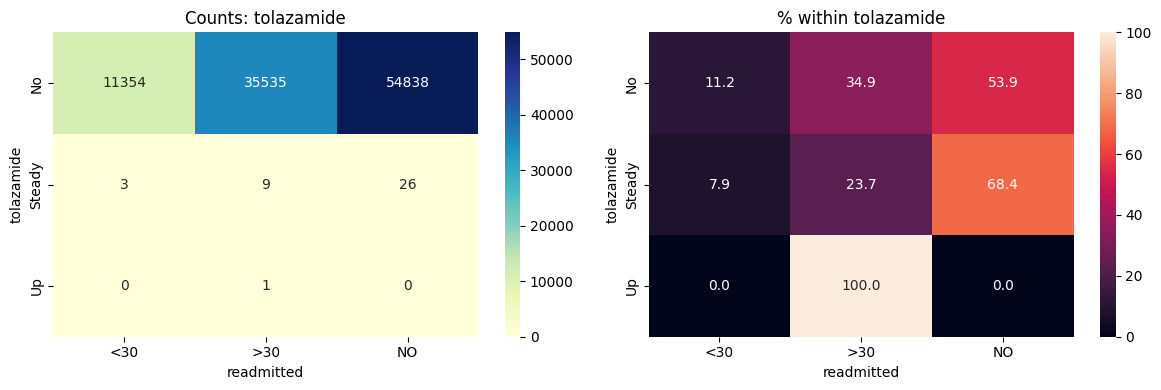


=== examide (grouped top 10 + Other) vs readmitted ===
Chi² = 0.0, p = 1.000, Cramér’s V = nan

Counts:
 readmitted    <30    >30     NO
examide                        
No          11357  35545  54864 

Row-percentages:
 readmitted   <30   >30    NO
examide                     
No          11.2  34.9  53.9 



/var/folders/v2/61mgjjb502v8_n3yxx3qfcl00000gn/T/ipykernel_42034/2507560513.py:24: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))


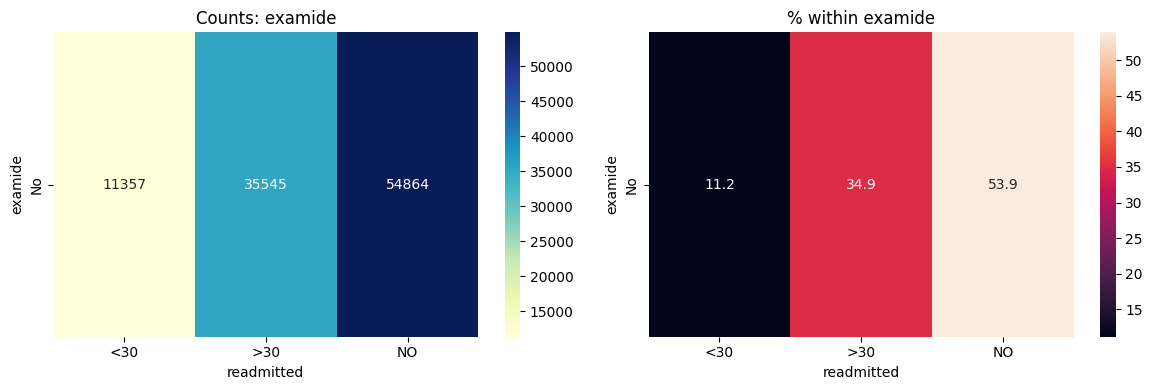

/var/folders/v2/61mgjjb502v8_n3yxx3qfcl00000gn/T/ipykernel_42034/2507560513.py:24: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))



=== citoglipton (grouped top 10 + Other) vs readmitted ===
Chi² = 0.0, p = 1.000, Cramér’s V = nan

Counts:
 readmitted     <30    >30     NO
citoglipton                     
No           11357  35545  54864 

Row-percentages:
 readmitted    <30   >30    NO
citoglipton                  
No           11.2  34.9  53.9 



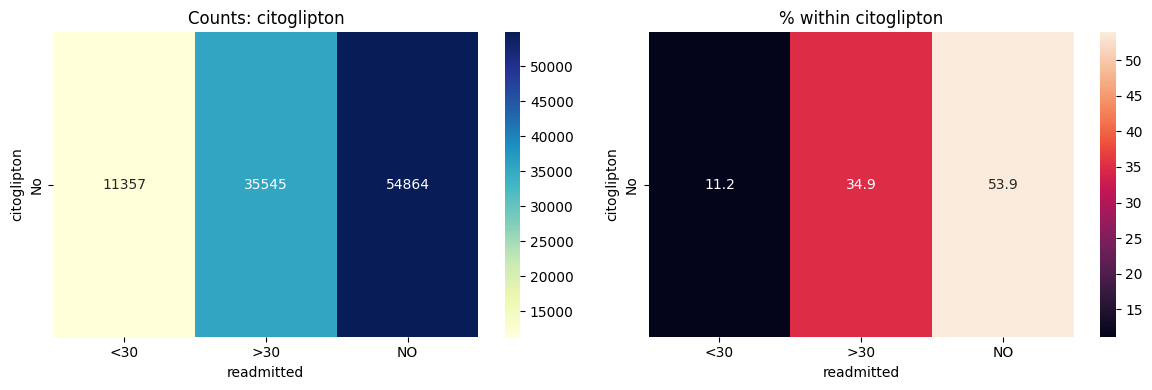


=== insulin (grouped top 10 + Other) vs readmitted ===
Chi² = 516.7, p = 0.000, Cramér’s V = 0.050

Counts:
 readmitted   <30    >30     NO
insulin                       
Down        1698   4752   5768
No          4756  15949  26678
Steady      3433  10482  16934
Up          1470   4362   5484 

Row-percentages:
 readmitted   <30   >30    NO
insulin                     
Down        13.9  38.9  47.2
No          10.0  33.7  56.3
Steady      11.1  34.0  54.9
Up          13.0  38.5  48.5 



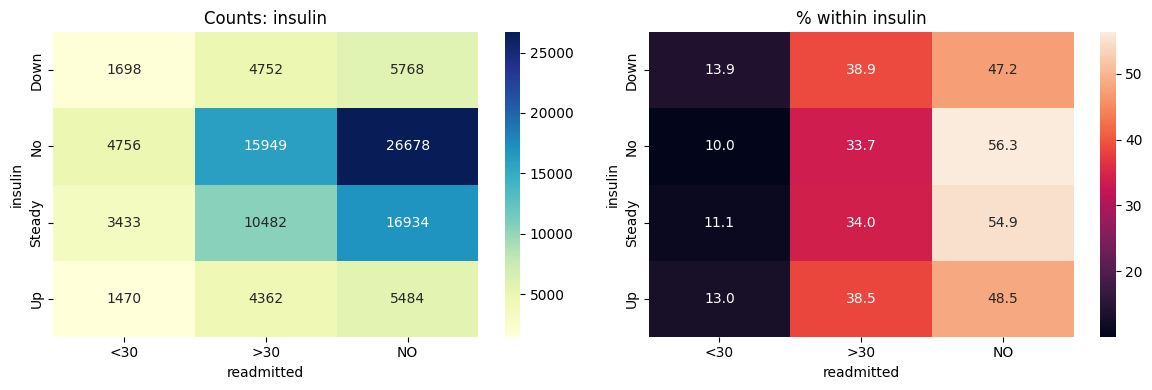


=== glyburide-metformin (grouped top 10 + Other) vs readmitted ===
Chi² = 8.5, p = 0.202, Cramér’s V = 0.006

Counts:
 readmitted             <30    >30     NO
glyburide-metformin                     
Down                     1      0      5
No                   11279  35287  54494
Steady                  77    257    358
Up                       0      1      7 

Row-percentages:
 readmitted            <30   >30    NO
glyburide-metformin                  
Down                 16.7   0.0  83.3
No                   11.2  34.9  53.9
Steady               11.1  37.1  51.7
Up                    0.0  12.5  87.5 



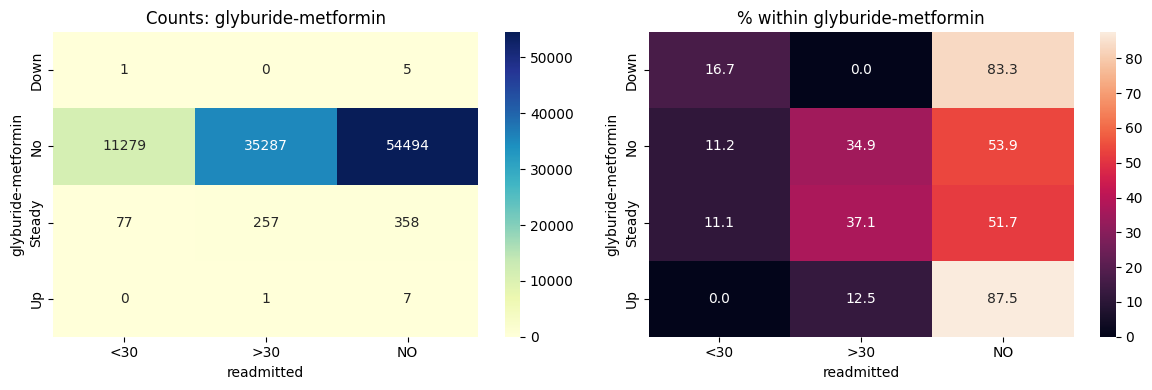


=== glipizide-metformin (grouped top 10 + Other) vs readmitted ===
Chi² = 2.0, p = 0.359, Cramér’s V = 0.004

Counts:
 readmitted             <30    >30     NO
glipizide-metformin                     
No                   11356  35538  54859
Steady                   1      7      5 

Row-percentages:
 readmitted            <30   >30    NO
glipizide-metformin                  
No                   11.2  34.9  53.9
Steady                7.7  53.8  38.5 



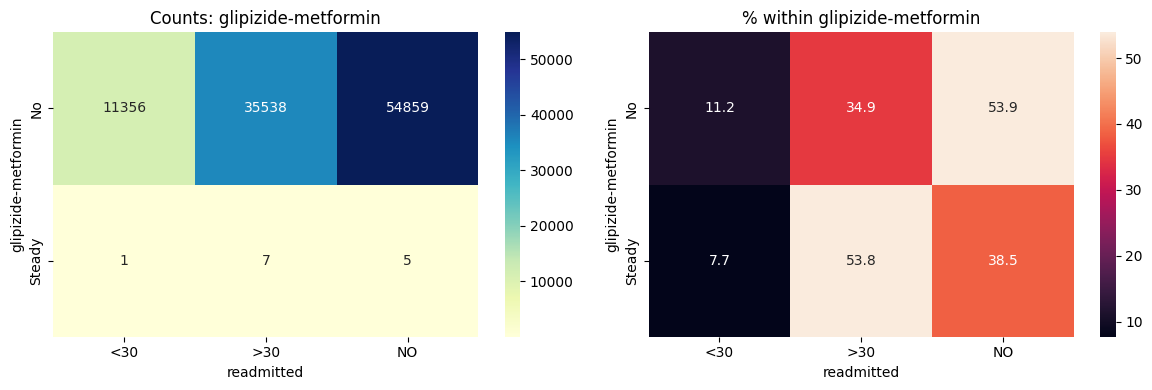


=== glimepiride-pioglitazone (grouped top 10 + Other) vs readmitted ===
Chi² = 1.9, p = 0.394, Cramér’s V = 0.004

Counts:
 readmitted                  <30    >30     NO
glimepiride-pioglitazone                     
No                        11357  35544  54864
Steady                        0      1      0 

Row-percentages:
 readmitted                 <30    >30    NO
glimepiride-pioglitazone                   
No                        11.2   34.9  53.9
Steady                     0.0  100.0   0.0 



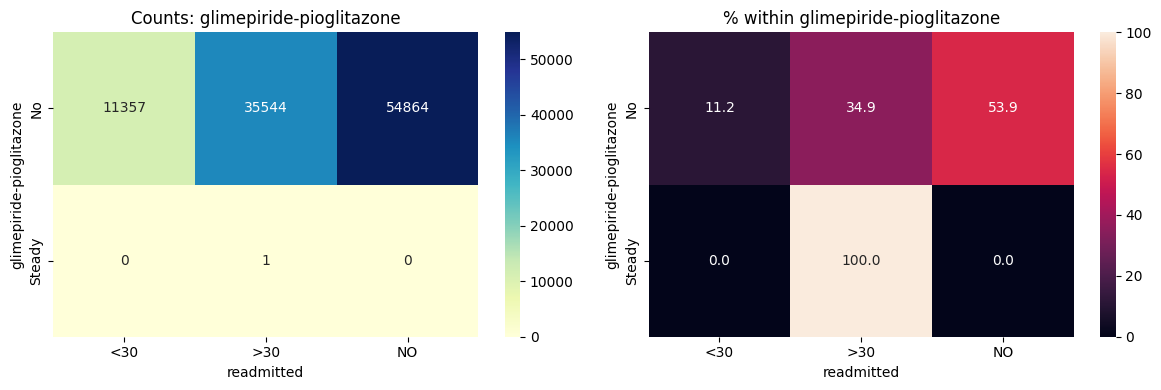


=== metformin-rosiglitazone (grouped top 10 + Other) vs readmitted ===
Chi² = 1.7, p = 0.425, Cramér’s V = 0.004

Counts:
 readmitted                 <30    >30     NO
metformin-rosiglitazone                     
No                       11357  35545  54862
Steady                       0      0      2 

Row-percentages:
 readmitted                <30   >30     NO
metformin-rosiglitazone                   
No                       11.2  34.9   53.9
Steady                    0.0   0.0  100.0 



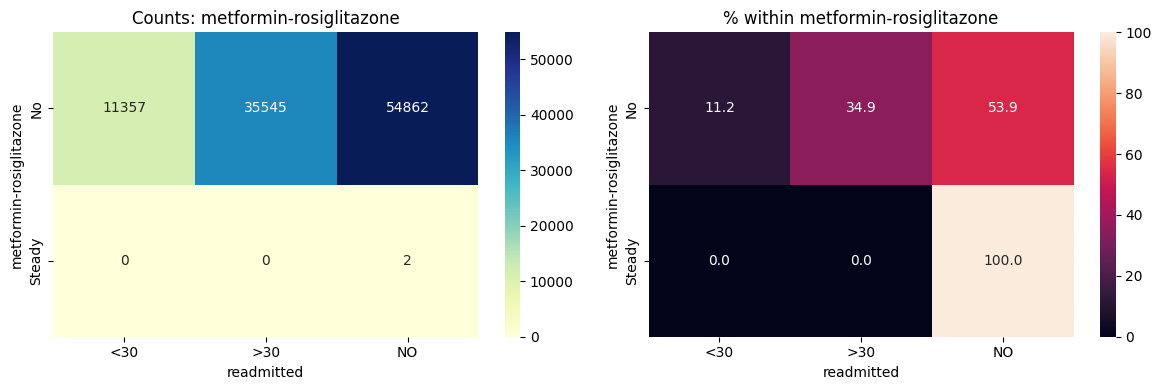


=== metformin-pioglitazone (grouped top 10 + Other) vs readmitted ===
Chi² = 0.9, p = 0.652, Cramér’s V = 0.003

Counts:
 readmitted                <30    >30     NO
metformin-pioglitazone                     
No                      11357  35545  54863
Steady                      0      0      1 

Row-percentages:
 readmitted               <30   >30     NO
metformin-pioglitazone                   
No                      11.2  34.9   53.9
Steady                   0.0   0.0  100.0 



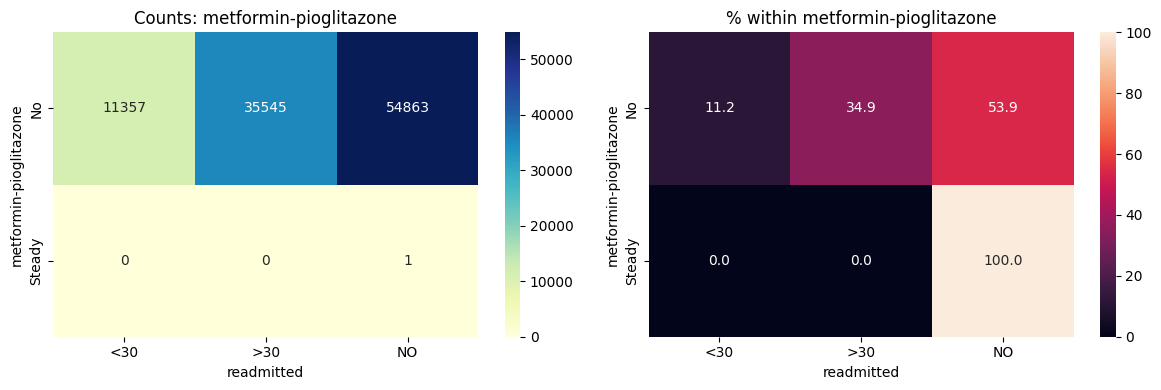


=== change (grouped top 10 + Other) vs readmitted ===
Chi² = 215.8, p = 0.000, Cramér’s V = 0.046

Counts:
 readmitted   <30    >30     NO
change                        
Ch          5558  17272  24181
No          5799  18273  30683 

Row-percentages:
 readmitted   <30   >30    NO
change                      
Ch          11.8  36.7  51.4
No          10.6  33.4  56.0 



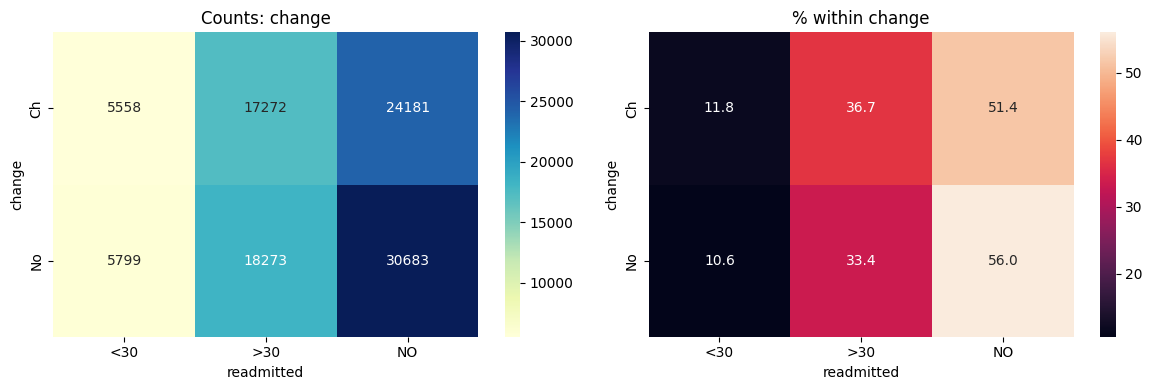


=== diabetesMed (grouped top 10 + Other) vs readmitted ===
Chi² = 386.5, p = 0.000, Cramér’s V = 0.062

Counts:
 readmitted    <30    >30     NO
diabetesMed                    
No           2246   7227  13930
Yes          9111  28318  40934 

Row-percentages:
 readmitted    <30   >30    NO
diabetesMed                  
No            9.6  30.9  59.5
Yes          11.6  36.1  52.2 



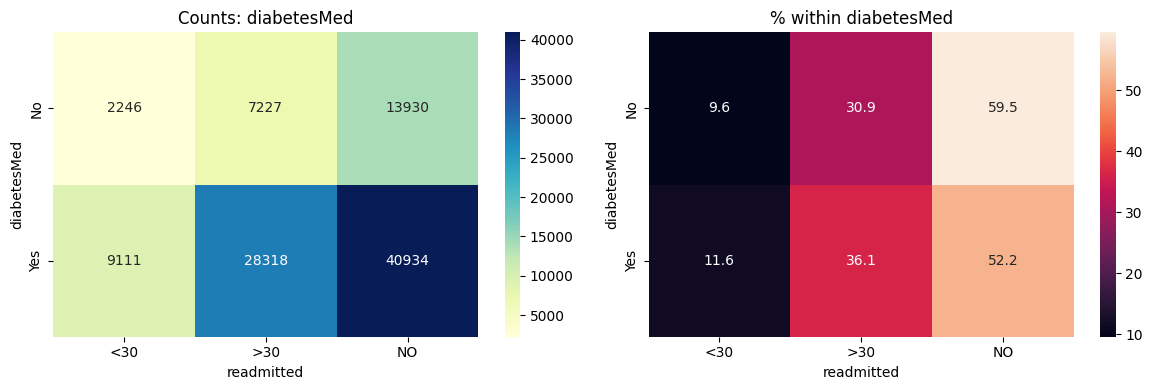


=== readmitted (grouped top 10 + Other) vs readmitted ===
Chi² = 203532.0, p = 0.000, Cramér’s V = 1.000

Counts:
 readmitted    <30    >30     NO
readmitted                     
<30         11357      0      0
>30             0  35545      0
NO              0      0  54864 

Row-percentages:
 readmitted    <30    >30     NO
readmitted                     
<30         100.0    0.0    0.0
>30           0.0  100.0    0.0
NO            0.0    0.0  100.0 



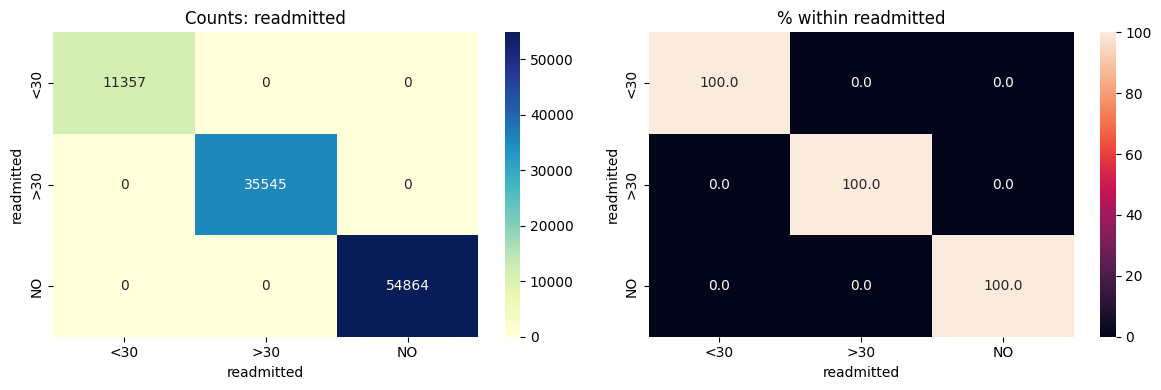

In [9]:
# Parameters
target = 'readmitted'
N = 10   # keep top-N levels, group the rest as 'Other'

# All categorical columns
cat_cols = data.select_dtypes(include='object').columns.tolist()

for cat in cat_cols:
    # 1) Determine top-N levels for this categorical column
    topn = data[cat].value_counts().nlargest(N).index.tolist()
    
    # 2) Make a copy and group rare levels into 'Other'
    df_sub = data.copy()
    df_sub[cat] = df_sub[cat].where(df_sub[cat].isin(topn), 'Other')
    
    # 3) Build contingency tables on the grouped column vs. target
    ct = pd.crosstab(df_sub[cat], df_sub[target])
    ct_norm = pd.crosstab(df_sub[cat], df_sub[target], normalize='index') * 100
    
    # 4) Chi-square & Cramér’s V
    chi2, p, dof, _ = chi2_contingency(ct)
    n = ct.values.sum()
    r, k = ct.shape
    cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))
    
    # 5) Print summary statistics
    print(f"\n=== {cat} (grouped top {N} + Other) vs {target} ===")
    print(f"Chi² = {chi2:.1f}, p = {p:.3f}, Cramér’s V = {cramers_v:.3f}\n")
    print("Counts:\n", ct, "\n")
    print("Row-percentages:\n", ct_norm.round(1), "\n")
    
    # 6) Plot side-by-side heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.heatmap(ct,      annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])
    axes[0].set_title(f"Counts: {cat}")
    axes[0].set_xlabel(target)
    axes[0].set_ylabel(cat)
    
    sns.heatmap(ct_norm, annot=True, fmt=".1f", cmap="rocket", ax=axes[1])
    axes[1].set_title(f"% within {cat}")
    axes[1].set_xlabel(target)
    axes[1].set_ylabel(cat)
    
    plt.tight_layout()
    plt.show()